## NILMTK Rapid Experimentation API

In [1]:
from nilmtk import DataSet

ds = DataSet('dsual.h5')

print("Buildings available:", ds.buildings)
elec = ds.buildings[1].elec
print("Mains:", elec.mains())
print("Appliances available:")
for app in elec.appliances:
    print(app)
print("Current types available:", elec.mains().available_ac_types('power'))



Buildings available: OrderedDict([(1, Building(instance=1, dataset='DSUAL'))])
Mains: ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])
Appliances available:
Appliance(type='electric space heater', instance=1)
Appliance(type='freezer', instance=1)
Appliance(type='Incandescent lamp', instance=1)
Appliance(type='electric shower heater', instance=1)
Appliance(type='fan', instance=1)
Appliance(type='television', instance=1)
Appliance(type='electric furnace', instance=1)
Appliance(type='fridge', instance=1)
Appliance(type='microwave', instance=1)
Appliance(type='vacuum cleaner', instance=1)
Current types available: ['active', 'apparent', 'reactive']


Now let's see version, summary, etc of nilmtk,nillmtk-metadata and nilmtk-contrib

In [1]:
pip show nilmtk

Name: nilmtk
Version: 0.4.0.dev1+git.303d45b
Summary: Estimate the energy consumed by individual appliances from whole-house power meter readings
Home-page: https://github.com/nilmtk/nilmtk
Author: NILMTK developers
Author-email: UNKNOWN
License: Apache 2.0
Location: c:\users\carlo\anaconda3\envs\nilmtk-env\lib\site-packages
Requires: hmmlearn, jupyterlab, matplotlib, networkx, numpy, pandas, pyyaml, scikit-learn, scipy, tables
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip show nilmtk_contrib

Name: nilmtk-contrib
Version: 0.1.2.dev1+git.0dd2ef5
Summary: State-of-the-art algorithms for the task of energy disaggregation implemented using NILMTK's Rapid Experimentation API
Home-page: https://github.com/nilmtk/nilmtk-contrib
Author: NILMTK-contrib developers
Author-email: 
License: Apache 2.0
Location: c:\users\carlo\nilmtk-contrib
Editable project location: c:\users\carlo\nilmtk-contrib
Requires: cvxpy, tensorflow
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip show nilm_metadata

Name: nilm-metadata
Version: 0.2.5
Summary: Concatenate NILM metadata
Home-page: https://github.com/nilmtk/nilm_metadata
Author: Jack Kelly
Author-email: jack.kelly@imperial.ac.uk
License: MIT
Location: c:\users\carlo\nilmtk-metadata
Editable project location: c:\users\carlo\nilmtk-metadata
Requires: pandas, PyYAML, six
Required-by: 
Note: you may need to restart the kernel to use updated packages.


# Block of the principal imports

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams
from nilmtk.utils import print_dict
from nilmtk import DataSet
import warnings
warnings. filterwarnings("ignore")
plt.style.use('bmh')

In [4]:
import keras
print("Keras version:",keras.__version__)
#import tensorflow.keras as tf_keras
#print(tf_keras.__version__)
import numpy as np
import pandas as pd

print("NumPy version:", np.__version__) 
print("Pandas version:", pd.__version__)

import matplotlib  as plt
print("Matplotlib version:", plt.__version__)


import sklearn as sl
print("Scikit-Learn:",sl.__version__)
import tables as tl
print ("Tables version:",tl.__version__)

Keras version: 2.11.0
NumPy version: 1.21.6
Pandas version: 0.25.3
Matplotlib version: 3.1.3
Scikit-Learn: 1.0.2
Tables version: 3.6.1


Now let try if nilmtk,nilmtk_metadata  and nilmtk_contrib works

In [5]:
import nilmtk
print(nilmtk.__version__)

0.4.0.dev1+git.303d45b


In [6]:
import nilm_metadata
print(nilm_metadata.__version__)

0.2.5.dev-7ed4bab


In [7]:
import nilmtk_contrib
print(nilmtk_contrib.__version__)

0.1.2.dev1+git.0dd2ef5


# Importing  for the different algorithms for disaggregation included in NILMTK

In [8]:
from nilmtk.disaggregate import Hart85
from nilmtk.disaggregate import Mean
from nilmtk.disaggregate import CO
from nilmtk.disaggregate import FHMMExact


#  Dataset 

In [10]:
# load the dataset 
ompm = DataSet('dsual.h5')
print_dict(ompm.metadata)  #metadata of the dataset

In [11]:
elec = ompm.buildings[1].elec #all of the dataset meters 
elec.get_timeframe()

TimeFrame(start='2023-06-09 09:34:38+02:00', end='2023-06-09 13:36:19+02:00', empty=False)

Here you can change the start and end dates of your test data set, and we also enter the values of the different parameters in the dictionary. Since we need several appliances, we enter the names of all the required appliances in the ‘appliances’ parameter. We also mention site_only is true because we want to disaggregate the site meter data only without any comparison with the submeter data.

In [14]:
from nilmtk import DataSet

ds = DataSet("dsual.h5")
elec = ds.buildings[1].elec
print("Appliances available:", elec.appliances)
print("Metrics available:", elec.available_power_ac_types())
ds.store.close()



Appliances available: [Appliance(type='vacuum cleaner', instance=1), Appliance(type='freezer', instance=1), Appliance(type='electric furnace', instance=1), Appliance(type='electric shower heater', instance=1), Appliance(type='microwave', instance=1), Appliance(type='electric space heater', instance=1), Appliance(type='fridge', instance=1), Appliance(type='fan', instance=1), Appliance(type='television', instance=1), Appliance(type='Incandescent lamp', instance=1)]
Metrics available: ['reactive', 'apparent', 'active']


In [15]:
from nilmtk import DataSet

ds = DataSet('dsual.h5')
for app in ds.buildings[1].elec.appliances:
    print(app)

Appliance(type='vacuum cleaner', instance=1)
Appliance(type='freezer', instance=1)
Appliance(type='electric furnace', instance=1)
Appliance(type='electric shower heater', instance=1)
Appliance(type='microwave', instance=1)
Appliance(type='electric space heater', instance=1)
Appliance(type='fridge', instance=1)
Appliance(type='fan', instance=1)
Appliance(type='television', instance=1)
Appliance(type='Incandescent lamp', instance=1)


In [16]:
labels = pd.DataFrame({'Instances': list(range(1,12)),
                       'Meters': ['Main', 'Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer']})

Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]


print('measurement ments available - Dataset: '+str(elec.available_physical_quantities()))
print('measurement ments of power  available - Dataset: '+str(elec.available_ac_types('power')))

print('\nmeasurement ments available for each meter:')
for x in range(len(labels)):
    print(str(labels['Meters'][x])+': '+str(elec[x+1].available_physical_quantities()))

print('\nmeasurement ments of power for each meter:')  
for x in range(len(labels)):
    print(str(labels['Meters'][x])+': '+str(elec[x+1].available_ac_types('power')))
    

measurement ments available - Dataset: ['current', 'power', 'voltage', 'pf', 'frequency']
measurement ments of power  available - Dataset: ['reactive', 'apparent', 'active']

measurement ments available for each meter:
Main: ['current', 'power', 'frequency', 'voltage', 'pf']
Electric furnace: ['current', 'power', 'frequency', 'voltage', 'pf']
Microwave: ['current', 'power', 'frequency', 'voltage', 'pf']
Television: ['current', 'power', 'frequency', 'voltage', 'pf']
Incandescent lamp: ['current', 'power', 'frequency', 'voltage', 'pf']
Vacuum cleaner: ['current', 'power', 'frequency', 'voltage', 'pf']
Electric space heater: ['current', 'power', 'frequency', 'voltage', 'pf']
Electric shower heater: ['current', 'power', 'frequency', 'voltage', 'pf']
Fan: ['current', 'power', 'frequency', 'voltage', 'pf']
Fridge: ['current', 'power', 'frequency', 'voltage', 'pf']
Freezer: ['current', 'power', 'frequency', 'voltage', 'pf']

measurement ments of power for each meter:
Main: ['active', 'apparen

In [ ]:
from nilmtk import DataSet

dataset = DataSet('dsual.h5')
elec = dataset.buildings[1].elec

# Obtain the list of appliances
for appliance in elec.appliances:
    print(appliance.label())

('freezer', 1)
('electric furnace', 1)
('electric space heater', 1)
('vacuum cleaner', 1)
('fan', 1)
('television', 1)
('fridge', 1)
('microwave', 1)
('Incandescent lamp', 1)
('electric shower heater', 1)


In [1]:
from nilmtk import DataSet
ds = DataSet('dsual.h5')
for appliance in ds.buildings[1].elec.appliances:
    print(f"Appliance: {appliance.type}, Identifier: {appliance.identifier}")

ds.store.close()

Appliance: {'parent': 'motor', 'type': 'fan', 'n_ancestors': 2, 'categories': {'electrical': ['single-phase induction motor'], 'traditional': 'consumer electronics', 'size': 'small', 'google_shopping': ['electronics']}, 'subtypes': ['desk', 'ceiling', 'extractor', 'single-room MVHR']}, Identifier: ApplianceID(type='fan', instance=1)
Appliance: {'parent': 'cold appliance', 'min_on_duration': 20, 'min_off_duration': 20, 'type': 'fridge', 'n_ancestors': 2, 'categories': {'traditional': 'cold', 'size': 'large', 'electrical': ['single-phase induction motor']}, 'distributions': {'rooms': [{'distribution_of_data': {'categories': ['kitchen', 'utility', 'basement', 'garage'], 'values': [0.5, 0.1, 0.1, 0.1]}, 'source': 'subjective', 'from_appliance_type': 'cold appliance', 'distance': 1}]}, 'components': [{'type': 'light', 'control': ['manual', 'timer'], 'do_not_merge_categories': True, 'parent': 'appliance', 'min_on_duration': 20, 'min_off_duration': 20, 'n_ancestors': 1, 'description': "We dis

In [18]:
from nilmtk import DataSet
ds = DataSet('dsual.h5')
print(ds.buildings[1].elec.appliances)

[Appliance(type='vacuum cleaner', instance=1), Appliance(type='freezer', instance=1), Appliance(type='electric furnace', instance=1), Appliance(type='electric shower heater', instance=1), Appliance(type='microwave', instance=1), Appliance(type='electric space heater', instance=1), Appliance(type='fridge', instance=1), Appliance(type='fan', instance=1), Appliance(type='television', instance=1), Appliance(type='Incandescent lamp', instance=1)]


Metrics no supported in nilmtk_contrib:
 
 - Mneap
 
 - Precision
 
 - Recall
 
 - Accuracy
 
 - Eae
 
And the metrics that are supported:
 
  - Mae
 
  - Rmse
 
  - F1-score
 
  - Nde

# ALGORITHM INCLUDED  IN  NILMTK TOOLKIT USED IN THE API

In [ ]:
from nilmtk.disaggregate import Hart85
from nilmtk.disaggregate import Mean
from nilmtk.disaggregate import CO
from nilmtk.disaggregate import FHMMExact

In [20]:
from nilmtk import DataSet

data = DataSet('dsual.h5')
print(data.metadata)  # Print metadata of the dataset


{'name': 'DSUAL', 'long_name': 'The Reference Energy Disaggregation Data set of the ALmeria University', 'creators': 'crn56', 'publication_date': 2022, 'institution': None, 'contact': 'crn565@inlumine.ual.es', 'description': None, 'subject': 'Disaggregated power demand from domestic buildings.', 'number_of_buildings': 1, 'timezone': 'Europe/Berlin', 'geo_location': {'locality': 'Almeria', 'country': 'ES', 'latitude': 36.83814, 'longitude': -2.45974}, 'related_documents': None, 'meter_devices': {'OZM': {'model': 'OZM', 'manufacturer': 'ual', 'manufacturer_url': 'https://openzmeter.com/', 'description': 'Multifunction meter for feeders', 'sample_period': 60, 'max_sample_period': 300, 'measurement ments': [{'physical_quantity': 'power', 'type': 'active', 'upper_limit': 10000, 'lower_limit': 0}, {'physical_quantity': 'power', 'type': 'apparent', 'upper_limit': 10000, 'lower_limit': 0}, {'physical_quantity': 'power', 'type': 'reactive', 'upper_limit': 10000, 'lower_limit': 0}, {'physical_qu

In [21]:
import pandas as pd

input_file = 'dsual.h5'  # 
with pd.HDFStore(input_file, mode='r') as store:
    print("Keys found in  HDF5 file:")
    for key in store.keys():
        print(key)


Keys found in  HDF5 file:
/building1/elec/meter1
/building1/elec/meter10
/building1/elec/meter11
/building1/elec/meter2
/building1/elec/meter3
/building1/elec/meter4
/building1/elec/meter5
/building1/elec/meter6
/building1/elec/meter7
/building1/elec/meter8
/building1/elec/meter9


Certainly, resampling in periods of less than 1 second is not possible directly from nilmtk, as it does not accept decimal values, so we will do it by code, converting the indices to datetime, resampling, and then saving to a new hdf5 file. 

# RESAMPLING of 500mS

First we're going to sample the dataset  with Harmonics

In [ ]:
import pandas as pd

input_file = 'dsualmh.h5'  # dataset file with 1 second resolution
output_file = 'dsualmh_500ms.h5' #dataset file to generate with 500 ms resolution

with pd.HDFStore(input_file, mode='r') as store:
    # Filter only the keys of the meters from building 1
    meter_keys = [key for key in store.keys() if key.startswith('/building1/elec/meter')]
    print(f"Meters found: {meter_keys}")
    
    with pd.HDFStore(output_file, mode='w') as out_store:
        for meter_key in meter_keys:
            # Read meter data
            df = store[meter_key]
            # Convert index to datetime if necessary
            if not isinstance(df.index, pd.DatetimeIndex):
                df.index = pd.to_datetime(df.index)
            # Resample to 500 ms using the mean
            df_resampled = df.resample('500ms').mean()
            # Save to the output file, maintaining the structure
            out_store.put(meter_key, df_resampled, format='table')
            print(f"Saved {meter_key} with {len(df_resampled)} samples")

print("Resampling complete! New file saved:", output_file)

# Second part

import tables
src_path = 'dsualmh.h5' # dataset file with 1 second resolution
dst_path = 'dsualmh_500ms.h5' #dataset file to generate with 500 ms resolution

with tables.open_file(src_path, mode='r') as src, tables.open_file(dst_path, mode='a') as dst:
    # Copy metadata from the root
    if 'metadata' in src.root._v_attrs._f_list():
        dst.root._v_attrs['metadata'] = src.root._v_attrs['metadata']
        print("Copied metadata from the root")
        
    # Copy metadata from /building1
    if hasattr(src.root, 'building1') and 'metadata' in src.root.building1._v_attrs._f_list():
        if not hasattr(dst.root, 'building1'):
            dst.create_group('/', 'building1')
        dst.root.building1._v_attrs['metadata'] = src.root.building1._v_attrs['metadata']
        print("Copied metadata from /building1")
        
    # Copy metadata from /building1/elec if it exists
    if hasattr(src.root.building1, 'elec') and 'metadata' in src.root.building1.elec._v_attrs._f_list():
        if not hasattr(dst.root.building1, 'elec'):
            dst.create_group('/building1', 'elec')
        dst.root.building1.elec._v_attrs['metadata'] = src.root.building1.elec._v_attrs['metadata']
        print("Copied metadata from /building1/elec")

print("All metadata copied!")


Meters found: ['/building1/elec/meter1', '/building1/elec/meter10', '/building1/elec/meter11', '/building1/elec/meter2', '/building1/elec/meter3', '/building1/elec/meter4', '/building1/elec/meter5', '/building1/elec/meter6', '/building1/elec/meter7', '/building1/elec/meter8', '/building1/elec/meter9']
Saved /building1/elec/meter1 with 29003 samples
Saved /building1/elec/meter10 with 29003 samples
Saved /building1/elec/meter11 with 29003 samples
Saved /building1/elec/meter2 with 29003 samples
Saved /building1/elec/meter3 with 29003 samples
Saved /building1/elec/meter4 with 29003 samples
Saved /building1/elec/meter5 with 29003 samples
Saved /building1/elec/meter6 with 29003 samples
Saved /building1/elec/meter7 with 29003 samples
Saved /building1/elec/meter8 with 29003 samples
Saved /building1/elec/meter9 with 29003 samples
Resampling complete! New file saved: dsualmh_500ms.h5
Copied metadata from the root
Copied metadata from /building1
All metadata copied!


Without harmonics

In [ ]:
import pandas as pd

input_file = 'dsual.h5'  # dataset file without harmonics with 1 second resolution
output_file = 'dsual_500ms.h5' #dataset file without harmonics to generate with 500 ms resolution

with pd.HDFStore(input_file, mode='r') as store:
    # Filter only the keys of the meters from building 1
    meter_keys = [key for key in store.keys() if key.startswith('/building1/elec/meter')]
    print(f"Meters found: {meter_keys}")
    
    with pd.HDFStore(output_file, mode='w') as out_store:
        for meter_key in meter_keys:
            # Read meter data
            df = store[meter_key]
            # Convert index to datetime if necessary
            if not isinstance(df.index, pd.DatetimeIndex):
                df.index = pd.to_datetime(df.index)
            # Resample to 500 ms using the mean
            df_resampled = df.resample('500ms').mean()
            # Save to the output file, maintaining the structure
            out_store.put(meter_key, df_resampled, format='table')
            print(f"Saved {meter_key} with {len(df_resampled)} samples")

print("Resampling complete! New file saved:", output_file)

# Second part

import tables
src_path = 'dsual.h5'
dst_path = 'dsual_500ms.h5'

with tables.open_file(src_path, mode='r') as src, tables.open_file(dst_path, mode='a') as dst:
    # Copy metadata from the root
    if 'metadata' in src.root._v_attrs._f_list():
        dst.root._v_attrs['metadata'] = src.root._v_attrs['metadata']
        print("Copied metadata from the root")
        
    # Copy metadata from /building1
    if hasattr(src.root, 'building1') and 'metadata' in src.root.building1._v_attrs._f_list():
        if not hasattr(dst.root, 'building1'):
            dst.create_group('/', 'building1')
        dst.root.building1._v_attrs['metadata'] = src.root.building1._v_attrs['metadata']
        print("Copied metadata from /building1")
        
    # Copy metadata from /building1/elec if it exists
    if hasattr(src.root.building1, 'elec') and 'metadata' in src.root.building1.elec._v_attrs._f_list():
        if not hasattr(dst.root.building1, 'elec'):
            dst.create_group('/building1', 'elec')
        dst.root.building1.elec._v_attrs['metadata'] = src.root.building1.elec._v_attrs['metadata']
        print("Copied metadata from /building1/elec")

print("All metadata copied!")


Meters found: ['/building1/elec/meter1', '/building1/elec/meter10', '/building1/elec/meter11', '/building1/elec/meter2', '/building1/elec/meter3', '/building1/elec/meter4', '/building1/elec/meter5', '/building1/elec/meter6', '/building1/elec/meter7', '/building1/elec/meter8', '/building1/elec/meter9']
Saved /building1/elec/meter1 with 29003 samples
Saved /building1/elec/meter10 with 29003 samples
Saved /building1/elec/meter11 with 29003 samples
Saved /building1/elec/meter2 with 29003 samples
Saved /building1/elec/meter3 with 29003 samples
Saved /building1/elec/meter4 with 29003 samples
Saved /building1/elec/meter5 with 29003 samples
Saved /building1/elec/meter6 with 29003 samples
Saved /building1/elec/meter7 with 29003 samples
Saved /building1/elec/meter8 with 29003 samples
Saved /building1/elec/meter9 with 29003 samples
Resampling complete! New file saved: dsual_500ms.h5
Copied metadata from the root
Copied metadata from /building1
All metadata copied!


# Resampling of 250ms

In [ ]:
import pandas as pd

input_file = 'dsualmh.h5'  # dataset file with 1 second resolution
output_file = 'dsualmh_250ms.h5' #dataset file to generate with 250 ms resolution

with pd.HDFStore(input_file, mode='r') as store:
    # Filter only the keys of the meters from building 1
    meter_keys = [key for key in store.keys() if key.startswith('/building1/elec/meter')]
    print(f"Meters found: {meter_keys}")
    
    with pd.HDFStore(output_file, mode='w') as out_store:
        for meter_key in meter_keys:
            # Read meter data
            df = store[meter_key]
            # Convert index to datetime if necessary
            if not isinstance(df.index, pd.DatetimeIndex):
                df.index = pd.to_datetime(df.index)
            # Resample to 250 ms using the mean
            df_resampled = df.resample('250ms').mean()
            # Save to the output file, maintaining the structure
            out_store.put(meter_key, df_resampled, format='table')
            print(f"Saved {meter_key} with {len(df_resampled)} samples")

print("Resampling complete! New file saved:", output_file)

# Second part

import tables
src_path = 'dsualmh.h5'# dataset file with 1 second resolution
dst_path = 'dsualmh_250ms.h5'#dataset file to generate with 250 ms resolution

with tables.open_file(src_path, mode='r') as src, tables.open_file(dst_path, mode='a') as dst:
    # Copy metadata from the root
    if 'metadata' in src.root._v_attrs._f_list():
        dst.root._v_attrs['metadata'] = src.root._v_attrs['metadata']
        print("Copied metadata from the root")
        
    # Copy metadata from /building1
    if hasattr(src.root, 'building1') and 'metadata' in src.root.building1._v_attrs._f_list():
        if not hasattr(dst.root, 'building1'):
            dst.create_group('/', 'building1')
        dst.root.building1._v_attrs['metadata'] = src.root.building1._v_attrs['metadata']
        print("Copied metadata from /building1")
        
    # Copy metadata from /building1/elec if it exists
    if hasattr(src.root.building1, 'elec') and 'metadata' in src.root.building1.elec._v_attrs._f_list():
        if not hasattr(dst.root.building1, 'elec'):
            dst.create_group('/building1', 'elec')
        dst.root.building1.elec._v_attrs['metadata'] = src.root.building1.elec._v_attrs['metadata']
        print("Copied metadata from /building1/elec")

print("All metadata copied!")

Meters found: ['/building1/elec/meter1', '/building1/elec/meter10', '/building1/elec/meter11', '/building1/elec/meter2', '/building1/elec/meter3', '/building1/elec/meter4', '/building1/elec/meter5', '/building1/elec/meter6', '/building1/elec/meter7', '/building1/elec/meter8', '/building1/elec/meter9']
Saved /building1/elec/meter1 with 58005 samples
Saved /building1/elec/meter10 with 58005 samples
Saved /building1/elec/meter11 with 58005 samples
Saved /building1/elec/meter2 with 58005 samples
Saved /building1/elec/meter3 with 58005 samples
Saved /building1/elec/meter4 with 58005 samples
Saved /building1/elec/meter5 with 58005 samples
Saved /building1/elec/meter6 with 58005 samples
Saved /building1/elec/meter7 with 58005 samples
Saved /building1/elec/meter8 with 58005 samples
Saved /building1/elec/meter9 with 58005 samples
Resampling complete! New file saved: dsualmh_250ms.h5
Copied metadata from the root
Copied metadata from /building1
All metadata copied!


Now  we create a new dataset without harmonics with sampling of 250 ms

In [1]:
import pandas as pd

input_file = 'dsual.h5'  # dataset file with 1 second resolution
output_file = 'dsual_250ms.h5' # dataset file with 1 second resolution

with pd.HDFStore(input_file, mode='r') as store:
    # Filter only the keys of the meters from building 1
    meter_keys = [key for key in store.keys() if key.startswith('/building1/elec/meter')]
    print(f"Meters found: {meter_keys}")
    
    with pd.HDFStore(output_file, mode='w') as out_store:
        for meter_key in meter_keys:
            # Read meter data
            df = store[meter_key]
            # Convert index to datetime if necessary
            if not isinstance(df.index, pd.DatetimeIndex):
                df.index = pd.to_datetime(df.index)
            # Resample to 250 ms using the mean
            df_resampled = df.resample('250ms').mean()
            # Save to the output file, maintaining the structure
            out_store.put(meter_key, df_resampled, format='table')
            print(f"Saved {meter_key} with {len(df_resampled)} samples")

print("Resampling complete! New file saved:", output_file)

# Second part

import tables
src_path = 'dsual.h5'
dst_path = 'dsual_250ms.h5'

with tables.open_file(src_path, mode='r') as src, tables.open_file(dst_path, mode='a') as dst:
    # Copy metadata from the root
    if 'metadata' in src.root._v_attrs._f_list():
        dst.root._v_attrs['metadata'] = src.root._v_attrs['metadata']
        print("Copied metadata from the root")
        
    # Copy metadata from /building1
    if hasattr(src.root, 'building1') and 'metadata' in src.root.building1._v_attrs._f_list():
        if not hasattr(dst.root, 'building1'):
            dst.create_group('/', 'building1')
        dst.root.building1._v_attrs['metadata'] = src.root.building1._v_attrs['metadata']
        print("Copied metadata from /building1")
        
    # Copy metadata from /building1/elec if it exists
    if hasattr(src.root.building1, 'elec') and 'metadata' in src.root.building1.elec._v_attrs._f_list():
        if not hasattr(dst.root.building1, 'elec'):
            dst.create_group('/building1', 'elec')
        dst.root.building1.elec._v_attrs['metadata'] = src.root.building1.elec._v_attrs['metadata']
        print("Copied metadata from /building1/elec")

print("All metadata copied!")


Meters found: ['/building1/elec/meter1', '/building1/elec/meter10', '/building1/elec/meter11', '/building1/elec/meter2', '/building1/elec/meter3', '/building1/elec/meter4', '/building1/elec/meter5', '/building1/elec/meter6', '/building1/elec/meter7', '/building1/elec/meter8', '/building1/elec/meter9']
Saved /building1/elec/meter1 with 58005 samples
Saved /building1/elec/meter10 with 58005 samples
Saved /building1/elec/meter11 with 58005 samples
Saved /building1/elec/meter2 with 58005 samples
Saved /building1/elec/meter3 with 58005 samples
Saved /building1/elec/meter4 with 58005 samples
Saved /building1/elec/meter5 with 58005 samples
Saved /building1/elec/meter6 with 58005 samples
Saved /building1/elec/meter7 with 58005 samples
Saved /building1/elec/meter8 with 58005 samples
Saved /building1/elec/meter9 with 58005 samples
Resampling complete! New file saved: dsual_250ms.h5
Copied metadata from the root
Copied metadata from /building1
All metadata copied!


## Resampling of 125ms

In [5]:
import pandas as pd

input_file = 'dsualmh.h5'  # dataset file with 1 second resolution
output_file = 'dsualmh_125ms.h5'

with pd.HDFStore(input_file, mode='r') as store:
    # Filter only the keys of the meters from building 1
    meter_keys = [key for key in store.keys() if key.startswith('/building1/elec/meter')]
    print(f"Meters found: {meter_keys}")
    
    with pd.HDFStore(output_file, mode='w') as out_store:
        for meter_key in meter_keys:
            # Read meter data
            df = store[meter_key]
            # Convert index to datetime if necessary
            if not isinstance(df.index, pd.DatetimeIndex):
                df.index = pd.to_datetime(df.index)
            # Resample to 125 ms using the mean
            df_resampled = df.resample('125ms').mean()
            # Save to the output file, maintaining the structure
            out_store.put(meter_key, df_resampled, format='table')
            print(f"Saved {meter_key} with {len(df_resampled)} samples")

print("Resampling complete! New file saved:", output_file)

# Second part

import tables
src_path = 'dsualmh.h5'
dst_path = 'dsualmh_125ms.h5'

with tables.open_file(src_path, mode='r') as src, tables.open_file(dst_path, mode='a') as dst:
    # Copy metadata from the root
    if 'metadata' in src.root._v_attrs._f_list():
        dst.root._v_attrs['metadata'] = src.root._v_attrs['metadata']
        print("Copied metadata from the root")
        
    # Copy metadata from /building1
    if hasattr(src.root, 'building1') and 'metadata' in src.root.building1._v_attrs._f_list():
        if not hasattr(dst.root, 'building1'):
            dst.create_group('/', 'building1')
        dst.root.building1._v_attrs['metadata'] = src.root.building1._v_attrs['metadata']
        print("Copied metadata from /building1")
        
    # Copy metadata from /building1/elec if it exists
    if hasattr(src.root.building1, 'elec') and 'metadata' in src.root.building1.elec._v_attrs._f_list():
        if not hasattr(dst.root.building1, 'elec'):
            dst.create_group('/building1', 'elec')
        dst.root.building1.elec._v_attrs['metadata'] = src.root.building1.elec._v_attrs['metadata']
        print("Copied metadata from /building1/elec")

print("All metadata copied!")

Meters found: ['/building1/elec/meter1', '/building1/elec/meter10', '/building1/elec/meter11', '/building1/elec/meter2', '/building1/elec/meter3', '/building1/elec/meter4', '/building1/elec/meter5', '/building1/elec/meter6', '/building1/elec/meter7', '/building1/elec/meter8', '/building1/elec/meter9']
Saved /building1/elec/meter1 with 116009 samples
Saved /building1/elec/meter10 with 116009 samples
Saved /building1/elec/meter11 with 116009 samples
Saved /building1/elec/meter2 with 116009 samples
Saved /building1/elec/meter3 with 116009 samples
Saved /building1/elec/meter4 with 116009 samples
Saved /building1/elec/meter5 with 116009 samples
Saved /building1/elec/meter6 with 116009 samples
Saved /building1/elec/meter7 with 116009 samples
Saved /building1/elec/meter8 with 116009 samples
Saved /building1/elec/meter9 with 116009 samples
Resampling complete! New file saved: dsualmh_125ms.h5
Copied metadata from the root
Copied metadata from /building1
All metadata copied!


Now without harmonics

In [6]:
import pandas as pd

input_file = 'dsual.h5'  # Change to your real file
output_file = 'dsual_125ms.h5'

with pd.HDFStore(input_file, mode='r') as store:
    # Filter only the keys of the meters from building 1
    meter_keys = [key for key in store.keys() if key.startswith('/building1/elec/meter')]
    print(f"Meters found: {meter_keys}")
    
    with pd.HDFStore(output_file, mode='w') as out_store:
        for meter_key in meter_keys:
            # Read meter data
            df = store[meter_key]
            # Convert index to datetime if necessary
            if not isinstance(df.index, pd.DatetimeIndex):
                df.index = pd.to_datetime(df.index)
            # Resample to 125 ms using the mean
            df_resampled = df.resample('125ms').mean()
            # Save to the output file, maintaining the structure
            out_store.put(meter_key, df_resampled, format='table')
            print(f"Saved {meter_key} with {len(df_resampled)} samples")

print("Resampling complete! New file saved:", output_file)

# Second part

import tables
src_path = 'dsual.h5'
dst_path = 'dsual_125ms.h5'

with tables.open_file(src_path, mode='r') as src, tables.open_file(dst_path, mode='a') as dst:
    # Copy metadata from the root
    if 'metadata' in src.root._v_attrs._f_list():
        dst.root._v_attrs['metadata'] = src.root._v_attrs['metadata']
        print("Copied metadata from the root")
        
    # Copy metadata from /building1
    if hasattr(src.root, 'building1') and 'metadata' in src.root.building1._v_attrs._f_list():
        if not hasattr(dst.root, 'building1'):
            dst.create_group('/', 'building1')
        dst.root.building1._v_attrs['metadata'] = src.root.building1._v_attrs['metadata']
        print("Copied metadata from /building1")
        
    # Copy metadata from /building1/elec if it exists
    if hasattr(src.root.building1, 'elec') and 'metadata' in src.root.building1.elec._v_attrs._f_list():
        if not hasattr(dst.root.building1, 'elec'):
            dst.create_group('/building1', 'elec')
        dst.root.building1.elec._v_attrs['metadata'] = src.root.building1.elec._v_attrs['metadata']
        print("Copied metadata from /building1/elec")

print("All metadata copied!")


Meters found: ['/building1/elec/meter1', '/building1/elec/meter10', '/building1/elec/meter11', '/building1/elec/meter2', '/building1/elec/meter3', '/building1/elec/meter4', '/building1/elec/meter5', '/building1/elec/meter6', '/building1/elec/meter7', '/building1/elec/meter8', '/building1/elec/meter9']
Saved /building1/elec/meter1 with 116009 samples
Saved /building1/elec/meter10 with 116009 samples
Saved /building1/elec/meter11 with 116009 samples
Saved /building1/elec/meter2 with 116009 samples
Saved /building1/elec/meter3 with 116009 samples
Saved /building1/elec/meter4 with 116009 samples
Saved /building1/elec/meter5 with 116009 samples
Saved /building1/elec/meter6 with 116009 samples
Saved /building1/elec/meter7 with 116009 samples
Saved /building1/elec/meter8 with 116009 samples
Saved /building1/elec/meter9 with 116009 samples
Resampling complete! New file saved: dsual_125ms.h5
Copied metadata from the root
Copied metadata from /building1
All metadata copied!


#  Metrics for all of the for algorithms using different sampling time

 - Sampling Times: 90,60,30,15,1,500ms,250ms and 125ms

 - Without  harmonics and 4 algorithms:FHMM,CO,MEAN and Hart85

### 90 seconds , without harmonics 

In [ ]:
# First, let's inspect the available appliances
from nilmtk import DataSet

# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")

import time
# Starting the measurement 
start_time = time.time()

# Define the experiment configuration
experiment1 = {
    'power': {
        'mains': ['active'],  # Simplify by using only active power
        'appliance': ['active']
    },
    'sample_rate':90, #90 seconds
      
     # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
      'appliances': [2,3,4,5,6,7,8,9,10,11],  # Use appliance identifiers instead of names
    
        'methods': {"FHMM_Exact": FHMMExact({'on_power_threshold': 0}),"CO": CO({'on_power_threshold': 0}),'Mean': Mean({'on_power_threshold': 0}),'Hart85': Hart85({'on_power_threshold': 0})},#ok
        'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

# Execute the experiment
api_results_experiment_1 = API(experiment1)


# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : FHMM
Generating predictions for : CO
...............CO disaggregate_chunk running.............
Generating predictions for : Mean
Generating predictions for : Hart85
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
............  mae  ..............
    FHMM_Exact          CO        Mean      Hart85
2   577.647339  456.301422  853.693542  583.616333
3   168.719040  249.372787  174.590347  159.261230
4    18.668341   17.327744   20.405121   57.764656
5    39.989925   30.144653   38.075672   51.442707
6   271.295746  214.609634  245.059219  134.762451
7   428.594086  170.707077  391.046356  208.149445
8   212.831772  425.779602  426.063568  358.444061
9    18.043459   18.620945   13.528361   53.292671
10   19.999033   36.392124   27.965345   43.496582
11

### 60 seconds without harmonics and 4 algorithms

In [ ]:
# First, let's inspect the available appliances
from nilmtk import DataSet
# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")
import time
# Start of the measurement 
start_time = time.time()

# Define the experiment configuration
experiment1 = {
    'power': {
        'mains': ['active'],  # Simplify by using only active power
        'appliance': ['active']
    },
    'sample_rate':60, #sampling of 60 seconds
      
     # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
      'appliances': [2,3,4,5,6,7,8,9,10,11],  # Use appliance identifiers instead of names 
    
        'methods': {"FHMM_Exact": FHMMExact({'on_power_threshold': 0}),"CO": CO({'on_power_threshold': 0}),'Mean': Mean({'on_power_threshold': 0}),'Hart85': Hart85({'on_power_threshold': 0})},#ok
        'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

# Execute the experiment
api_results_experiment_1 = API(experiment1)

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : FHMM
Generating predictions for : CO
...............CO disaggregate_chunk running.............
Generating predictions for : Mean
Generating predictions for : Hart85
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
............  mae  ..............
    FHMM_Exact          CO        Mean      Hart85
2   350.951447  646.486755  864.164795  597.703430
3   265.763733  239.279205  186.882751  143.099442
4    11.063234   18.124540   20.463791  125.593048
5    47.237236   44.823738   39.049526  117.374741
6   335.852600  223.133224  238.385452  190.182648
7   170.162811  397.394958  380.807465  281.996948
8   189.649628  566.383789  457.313965  397.066101
9    15.169563   16.554745   14.439581  121.803162
10   41.421177   34.977451   29.444151  111.547020
11

### 30 seconds  without harmonics and 4 algorithms

In [ ]:
# First, let's inspect the available appliances
from nilmtk import DataSet

# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")

import time
# Start of the measurement 
start_time = time.time()

# Define the experiment configuration
experiment1 = {
    'power': {
        'mains': ['active'],  # Simplify by using only active power
        'appliance': ['active']
    },
    'sample_rate':30, #sampling of  30 seconds
      
     # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
      'appliances': [2,3,4,5,6,7,8,9,10,11],  # Use appliance identifiers instead of names
        'methods': {"FHMM_Exact": FHMMExact({'on_power_threshold': 0}),"CO": CO({'on_power_threshold': 0}),'Mean': Mean({'on_power_threshold': 0}),'Hart85': Hart85({'on_power_threshold': 0})},#ok
        'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

# Execute the experiment
api_results_experiment_1 = API(experiment1)


# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : FHMM
Generating predictions for : CO
...............CO disaggregate_chunk running.............
Generating predictions for : Mean
Generating predictions for : Hart85
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
............  mae  ..............
    FHMM_Exact          CO        Mean      Hart85
2   537.339478  588.438171  874.510193  597.703430
3   249.807541  212.415833  192.204178  184.941437
4    14.512375   17.205097   20.434168   33.723263
5    39.100769   41.300350   39.227386   39.599045
6   225.384674  238.704102  241.934525  201.160461
7   397.222321  501.205505  394.168884  174.744659
8   184.588837  444.408112  471.714661  397.002014
9    17.047390   20.083010   14.630705   23.884375
10   23.954973   37.158073   30.727360   26.614498
11

### 15 seconds without harmonics and 4 algorithms

In [ ]:
# First, let's inspect the available appliances
from nilmtk import DataSet

# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")

import time
# Starting the measurement 
start_time = time.time()

# Define the experiment configuration
experiment1 = {
    'power': {
        'mains': ['active'],  # Simplify by using only active power
        'appliance': ['active']
    },
    'sample_rate':15, #Sampling of 15 seconds
      
     # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
      'appliances': [2,3,4,5,6,7,8,9,10,11],  # Use appliance identifiers instead of names
    
        'methods': {"FHMM_Exact": FHMMExact({'on_power_threshold': 0}),"CO": CO({'on_power_threshold': 0}),'Mean': Mean({'on_power_threshold': 0}),'Hart85': Hart85({'on_power_threshold': 0})},#ok
        'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

# Execute the experiment
api_results_experiment_1 = API(experiment1)


# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : FHMM
Generating predictions for : CO
...............CO disaggregate_chunk running.............
Generating predictions for : Mean
Generating predictions for : Hart85
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
............  mae  ..............
    FHMM_Exact          CO        Mean      Hart85
2   386.828827  428.473511  905.793274  588.748840
3   162.544464  228.660202  196.084488  184.941437
4    19.872135   17.585024   20.795799   33.723263
5    27.843351   40.182037   41.079678   39.599049
6   260.518707  222.257263  249.235321   83.128738
7   425.612579  354.783875  394.168884  424.808014
8   158.921722  420.916382  491.818970  490.240051
9    24.040798   17.329170   15.679932   23.884375
10   34.021557   41.530479   31.687220   26.614502
11

### 1 second  without harmonics and 4 algorithms

In [ ]:
# First, let's inspect the available appliances
from nilmtk import DataSet

# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")

import time
# Start the measurement 
start_time = time.time()
# Define the experiment configuration
experiment1 = {
    'power': {
        'mains': ['active'],  # Simplify by using only active power
        'appliance': ['active']
    },
    'sample_rate':1, #Sampling of 1 second
      
     # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
      'appliances': [2,3,4,5,6,7,8,9,10,11],  # Use appliance identifiers instead of names
    
        'methods': {"FHMM_Exact": FHMMExact({'on_power_threshold': 0}),"CO": CO({'on_power_threshold': 0}),'Mean': Mean({'on_power_threshold': 0}),'Hart85': Hart85({'on_power_threshold': 0})},#ok
        'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

# Execute the experiment
api_results_experiment_1 = API(experiment1)


# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : FHMM
Generating predictions for : CO
...............CO disaggregate_chunk running.............
Generating predictions for : Mean
Generating predictions for : Hart85
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
............  mae  ..............
    FHMM_Exact          CO        Mean      Hart85
2   322.330597  543.913025  910.207520  423.290283
3   353.969513  297.751465  217.588898  184.941437
4    19.232735   21.743179   20.893730   33.723259
5    26.419779   44.926895   41.338013   39.599049
6   199.359299  222.723938  250.075256   83.128746
7    82.461166  333.950470  398.601715  174.744675
8   463.416351  368.411346  496.986938  426.208221
9    18.313068   15.546529   15.888822   23.884373
10   27.084667  173.659683   31.911043   26.614500
11

### 500 ms  without harmonics and 4 algorithms

In [ ]:
# First, let's inspect the available appliances
from nilmtk import DataSet

# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")

import time
# Starting the measurement ment
start_time = time.time()

# Define the experiment configuration
experiment1 = {
    'power': {
        'mains': ['active'],  # Simplify by using only active power
        'appliance': ['active']
    },
    'sample_rate':1, #Sampling of 0.500 seconds (see dsual_500ms.h5)
      
     # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
      'appliances': [2,3,4,5,6,7,8,9,10,11],  # Use appliance identifiers instead of names
    
        'methods': {"FHMM_Exact": FHMMExact({'on_power_threshold': 0}),"CO": CO({'on_power_threshold': 0}),'Mean': Mean({'on_power_threshold': 0}),'Hart85': Hart85({'on_power_threshold': 0})},#ok
        'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual_500ms.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual_500ms.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

# Execute the experiment
api_results_experiment_1 = API(experiment1)


# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : FHMM
Generating predictions for : CO
...............CO disaggregate_chunk running.............
Generating predictions for : Mean
Generating predictions for : Hart85
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
............  mae  ..............
    FHMM_Exact          CO        Mean      Hart85
2   322.330597  531.858154  910.207520  423.290283
3   353.969513  287.366882  217.588898  184.941437
4    19.232735   15.732625   20.893730   33.723259
5    26.419779   40.501087   41.338013   39.599049
6   199.359299  219.970963  250.075256   83.128746
7    82.461166  364.895355  398.601715  174.744675
8   463.416351  388.191833  496.986938  426.208221
9    18.313068   17.694798   15.888822   23.884373
10   27.084667  121.855110   31.911043   26.614500
11

### 250 ms without harmonics and 4 algorithms

In [ ]:
# First, let's inspect the available appliances
from nilmtk import DataSet


# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")

import time
# Starting the measurement 
start_time = time.time()

# Define the experiment configuration
experiment1 = {
    'power': {
        'mains': ['active'],  # Simplify by using only active power
        'appliance': ['active']
    },
    'sample_rate':1, #Sampling  with 0.250 seconds ( see dsual_250ms.h5)
      
     # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
      'appliances': [2,3,4,5,6,7,8,9,10,11],  # Use appliance identifiers instead of names 
    
        'methods': {"FHMM_Exact": FHMMExact({'on_power_threshold': 0}),"CO": CO({'on_power_threshold': 0}),'Mean': Mean({'on_power_threshold': 0}),'Hart85': Hart85({'on_power_threshold': 0})},#ok
        'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual_250ms.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual_250ms.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

# Execute the experiment
api_results_experiment_1 = API(experiment1)


# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : FHMM
Generating predictions for : CO
...............CO disaggregate_chunk running.............
Generating predictions for : Mean
Generating predictions for : Hart85
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
............  mae  ..............
    FHMM_Exact          CO        Mean      Hart85
2   322.330597  520.918579  910.207520  423.290283
3   353.969513  284.989990  217.588898  184.941437
4    19.232735   16.142620   20.893730   33.723259
5    26.419779   35.659496   41.338013   39.599049
6   199.359299  228.414047  250.075256   83.128746
7    82.461166  424.396454  398.601715  174.744675
8   463.416351  384.819214  496.986938  426.208221
9    18.313068   17.205397   15.888822   23.884373
10   27.084667  169.586487   31.911043   26.614500
11

### 125ms without harmonics and 4 algorithms

In [11]:
# First, let's inspect the available appliances
from nilmtk import DataSet

# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")

import time
# starting the measurement ment
start_time = time.time()

# Define the experiment configuration
experiment1 = {
    'power': {
        'mains': ['active'],  # Simplify by using only active power
        'appliance': ['active']
    },
    'sample_rate':1, # Sampling with 0.125 seconds (see dsual_125ms.h5)
      
     # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
      'appliances': [2,3,4,5,6,7,8,9,10,11],  # Use appliance identifiers instead of names
    
        'methods': {"FHMM_Exact": FHMMExact({'on_power_threshold': 0}),"CO": CO({'on_power_threshold': 0}),'Mean': Mean({'on_power_threshold': 0}),'Hart85': Hart85({'on_power_threshold': 0})},#ok
        'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual_125ms.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual_125ms.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

# Execute the experiment
api_results_experiment_1 = API(experiment1)


# End of the measurement ment
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : FHMM
Generating predictions for : CO
...............CO disaggregate_chunk running.............
Generating predictions for : Mean
Generating predictions for : Hart85
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
............  mae  ..............
    FHMM_Exact          CO        Mean      Hart85
2   322.330597  544.111206  910.207520  423.290283
3   353.969513  295.943848  217.588898  184.941437
4    19.232735   18.930862   20.893730   33.723259
5    26.419779   44.776836   41.338013   39.599049
6   199.359299  232.268600  250.075256   83.128746
7    82.461166  428.608429  398.601715  174.744675
8   463.416351  390.799530  496.986938  426.208221
9    18.313068   16.374676   15.888822   23.884373
10   27.084667  141.696838   31.911043   26.614500
11

  ##  USING HARMONICS  AND DIFFERENT PERIODS OF SAMPLING
   
   #
   
   ### 90 seconds with harmonics and 4 algorithms

In [ ]:
# First, let's inspect the available appliances
from nilmtk import DataSet

# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")

import time
# starting the measurement 
start_time = time.time()

# Define the experiment configuration
experiment1 = {
    'power': {
        'mains': ['active'],  # Simplify by using only active power
        'appliance': ['active']
    },
    'sample_rate':90, #Sampling of 90 seconds
      
     # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
      'appliances': [2,3,4,5,6,7,8,9,10,11],  # Use appliance identifiers instead of names
    
        'methods': {"FHMM_Exact": FHMMExact({'on_power_threshold': 0}),"CO": CO({'on_power_threshold': 0}),'Mean': Mean({'on_power_threshold': 0}),'Hart85': Hart85({'on_power_threshold': 0})},#ok
        'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

# Execute the experiment
api_results_experiment_1 = API(experiment1)


# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : FHMM
Generating predictions for : CO
...............CO disaggregate_chunk running.............
Generating predictions for : Mean
Generating predictions for : Hart85
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
............  mae  ..............
    FHMM_Exact          CO        Mean      Hart85
2   577.647339  456.301422  853.693542  583.616333
3   168.719040  249.372787  174.590347  159.261230
4    18.668341   17.327744   20.405121   57.764656
5    39.989925   30.144653   38.075672   51.442707
6   271.295746  214.609634  245.059219  134.762451
7   428.594086  170.707077  391.046356  208.149445
8   212.831772  425.779602  426.063568  358.444061
9    18.043459   18.620945   13.528361   53.292671
10   19.999033   36.392124   27.965345   43.496582
11

### 60 seconds with harmonics and 4 algorithms

In [ ]:
# First, let's inspect the available appliances
from nilmtk import DataSet

# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")

import time
# Starting the measurement 
start_time = time.time()

# Define the experiment configuration
experiment1 = {
    'power': {
        'mains': ['active'],  # Simplify by using only active power
        'appliance': ['active']
    },
    'sample_rate':60, #Sampling of 60 seconds
      
     # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
      'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
    
        'methods': {"FHMM_Exact": FHMMExact({'on_power_threshold': 0}),"CO": CO({'on_power_threshold': 0}),'Mean': Mean({'on_power_threshold': 0}),'Hart85': Hart85({'on_power_threshold': 0})},#ok
        'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

# Execute the experiment
api_results_experiment_1 = API(experiment1)


#   End of the measurement ment  
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : FHMM
Generating predictions for : CO
...............CO disaggregate_chunk running.............
Generating predictions for : Mean
Generating predictions for : Hart85
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
............  mae  ..............
    FHMM_Exact          CO        Mean      Hart85
2   350.951447  646.486755  864.164795  597.703430
3   265.763733  239.279205  186.882751  143.099442
4    11.063234   18.124540   20.463791  125.593048
5    47.237236   44.823738   39.049526  117.374741
6   335.852600  223.133224  238.385452  190.182648
7   170.162811  397.394958  380.807465  281.996948
8   189.649628  566.383789  457.313965  397.066101
9    15.169563   16.554745   14.439581  121.803162
10   41.421177   34.977451   29.444151  111.547020
11

### 30 seconds with harmonics and 4 algorithms

In [ ]:
# First, let's inspect the available appliances
from nilmtk import DataSet

# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")

import time
# Starting the measurement 
start_time = time.time()
# Define the experiment configuration
experiment1 = {
    'power': {
        'mains': ['active'],  # Simplify by using only active power
        'appliance': ['active']
    },
    'sample_rate':30, # 30 seconds of sampling
      
     # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
      'appliances': [2,3,4,5,6,7,8,9,10,11],  # Use appliance identifiers instead of names
    
        'methods': {"FHMM_Exact": FHMMExact({'on_power_threshold': 0}),"CO": CO({'on_power_threshold': 0}),'Mean': Mean({'on_power_threshold': 0}),'Hart85': Hart85({'on_power_threshold': 0})},#ok
        'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

# Execute the experiment
api_results_experiment_1 = API(experiment1)

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : FHMM
Generating predictions for : CO
...............CO disaggregate_chunk running.............
Generating predictions for : Mean
Generating predictions for : Hart85
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
............  mae  ..............
    FHMM_Exact          CO        Mean      Hart85
2   537.339478  588.438171  874.510193  597.703430
3   249.807541  212.415833  192.204178  184.941437
4    14.512375   17.205097   20.434168   33.723263
5    39.100769   41.300350   39.227386   39.599045
6   225.384674  238.704102  241.934525  201.160461
7   397.222321  501.205505  394.168884  174.744659
8   184.588837  444.408112  471.714661  397.002014
9    17.047390   20.083010   14.630705   23.884375
10   23.954973   37.158073   30.727360   26.614498
11

### 15 seconds with harmonics and 4 algorithms

In [13]:
# First, let's inspect the available appliances
from nilmtk import DataSet

# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")

import time
# Starting the measurement 
start_time = time.time()

# Define the experiment configuration
experiment1 = {
    'power': {
        'mains': ['active'],  # Simplify by using only active power
        'appliance': ['active']
    },
    'sample_rate':15, # Sampling of 15 seconds
      
     # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
      'appliances': [2,3,4,5,6,7,8,9,10,11],  # Use appliance identifiers instead of names
    
        'methods': {"FHMM_Exact": FHMMExact({'on_power_threshold': 0}),"CO": CO({'on_power_threshold': 0}),'Mean': Mean({'on_power_threshold': 0}),'Hart85': Hart85({'on_power_threshold': 0})},#ok
        'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

# Execute the experiment
api_results_experiment_1 = API(experiment1)


# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : FHMM
Generating predictions for : CO
...............CO disaggregate_chunk running.............
Generating predictions for : Mean
Generating predictions for : Hart85
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
............  mae  ..............
    FHMM_Exact          CO        Mean      Hart85
2   386.828827  428.473511  905.793274  588.748840
3   162.544464  228.660202  196.084488  184.941437
4    19.872135   17.585024   20.795799   33.723263
5    27.843351   40.182037   41.079678   39.599049
6   260.518707  222.257263  249.235321   83.128738
7   425.612579  354.783875  394.168884  424.808014
8   158.921722  420.916382  491.818970  490.240051
9    24.040798   17.329170   15.679932   23.884375
10   34.021557   41.530479   31.687220   26.614502
11

### 1 second with harmonics and 4 algorithms

In [ ]:
# First, let's inspect the available appliances
from nilmtk import DataSet

# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")

import time
# Starting the measurement 
start_time = time.time()

# Define the experiment configuration
experiment1 = {
    'power': {
        'mains': ['active'],  # Simplify by using only active power
        'appliance': ['active']
    },
    'sample_rate':1, # Sampling of 1 second
      
     # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
      'appliances': [2,3,4,5,6,7,8,9,10,11],  # Use appliance identifiers instead of names
    
        'methods': {"FHMM_Exact": FHMMExact({'on_power_threshold': 0}),"CO": CO({'on_power_threshold': 0}),'Mean': Mean({'on_power_threshold': 0}),'Hart85': Hart85({'on_power_threshold': 0})},#ok
        'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

# Execute the experiment
api_results_experiment_1 = API(experiment1)

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : FHMM
Generating predictions for : CO
...............CO disaggregate_chunk running.............
Generating predictions for : Mean
Generating predictions for : Hart85
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
............  mae  ..............
    FHMM_Exact          CO        Mean      Hart85
2   322.330597  540.427185  910.207520  423.290283
3   353.969513  293.316833  217.588898  184.941437
4    19.232735   18.614824   20.893730   33.723259
5    26.419779   42.280609   41.338013   39.599049
6   199.359299  220.618896  250.075256   83.128746
7    82.461166  471.109558  398.601715  174.744675
8   463.416351  404.602936  496.986938  426.208221
9    18.313068   15.638173   15.888822   23.884373
10   27.084667  150.967804   31.911043   26.614500
11

### IMPORTANT: using harmonics is obtained error with sampling  time < 1 second

# EFFECT OF THE POWER FILTER  USING  4 REFERENCE ALGORITHMS

### Without harmonics, filter of 10 Watt , 4 algorithms and 1 second

In [ ]:
# First, let's inspect the available appliances
from nilmtk import DataSet


# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")

import time
# Start of the measurement 
start_time = time.time()

# Define the experiment configuration
experiment1 = {
    'power': {
        'mains': ['active'],  # Simplify by using only active power
        'appliance': ['active']
    },
    'sample_rate':1, # Sampling of 1 second
      
     # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
      'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
    
        'methods': {"FHMM_Exact": FHMMExact({'on_power_threshold': 10}),"CO": CO({'on_power_threshold': 10}),'Mean': Mean({'on_power_threshold': 10}),'Hart85': Hart85({'on_power_threshold': 10})},#ok
        'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

# Execute the experiment
api_results_experiment_1 = API(experiment1)


#  End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : FHMMExact
Generating predictions for : CO
...............CO disaggregate_chunk running.............
Generating predictions for : Mean
Generating predictions for : Hart85
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
............  mae  ..............
    FHMM_Exact          CO        Mean      Hart85
2   512.305908  552.215027  910.207520  423.290283
3   339.540985  284.775665  217.588898  184.941437
4    20.681084   14.537904   20.893730   33.723259
5    41.268909   44.673489   41.338013   39.599049
6   274.600342  209.343033  250.075256   83.128746
7   321.506653  381.885376  398.601715  174.744675
8   584.112183  366.923157  496.986938  426.208221
9    16.452642   19.278278   15.888822   23.884373
10   37.135036  140.378098   31.911043   26.6145

### Using harmonics, filter of 10 watt and 4 algorithms

In [ ]:
# First, let's inspect the available appliances
from nilmtk import DataSet


# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")

import time
# Start of the measurement 
start_time = time.time()
# Define the experiment configuration
experiment1 = {
    'power': {
        'mains': ['active'],  # Simplify by using only active power
        'appliance': ['active']
    },
    'sample_rate':1, #Sampling of 1 second
      
     # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
      'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
      'methods': {"FHMM_Exact": FHMMExact({'on_power_threshold': 10}),"CO": CO({'on_power_threshold': 10}),'Mean': Mean({'on_power_threshold': 10}),'Hart85': Hart85({'on_power_threshold': 10})},#ok
      'train': {
      'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

# Execute the experiment
api_results_experiment_1 = API(experiment1)


# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : FHMMExact
Generating predictions for : CO
...............CO disaggregate_chunk running.............
Generating predictions for : Mean
Generating predictions for : Hart85
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
............  mae  ..............
    FHMM_Exact          CO        Mean      Hart85
2   440.605591  544.152222  910.207520  423.290283
3   340.966858  298.661469  217.588898  184.941437
4    20.380468   15.595840   20.893730   33.723259
5    35.839050   38.316986   41.338013   39.599049
6   248.007248  235.472305  250.075256   83.128746
7   209.387604  421.718140  398.601715  174.744675
8   519.988403  446.446747  496.986938  426.208221
9    18.909313   19.166563   15.888822   23.884373
10   31.665260  173.716736   31.911043   26.6145

### Without harmonics, using a filter of 50 Watt and 4 algorithms

In [ ]:
# First, let's inspect the available appliances
from nilmtk import DataSet



# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")

import time
# Start of the measurement 
start_time = time.time()

# Define the experiment configuration
experiment1 = {
    'power': {
        'mains': ['active'],  # Simplify by using only active power
        'appliance': ['active']
    },
    'sample_rate':1, #Sampling of 1 second
      
     # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
      'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
        'methods': {"FHMM_Exact": FHMMExact({'on_power_threshold': 50}),"CO": CO({'on_power_threshold': 50}),'Mean': Mean({'on_power_threshold': 50}),'Hart85': Hart85({'on_power_threshold': 50})},#ok
        'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

# Execute the experiment
api_results_experiment_1 = API(experiment1)

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : FHMMExact
Generating predictions for : CO
...............CO disaggregate_chunk running.............
Generating predictions for : Mean
Generating predictions for : Hart85
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
............  mae  ..............
    FHMM_Exact          CO        Mean      Hart85
2   228.213242  535.969421  910.207520  423.290283
3   288.472168  283.382996  217.588898  184.941437
4    24.550243   15.090576   20.893730   33.723259
5    52.836990   42.712898   41.338013   39.599049
6   249.929977  175.602295  250.075256   83.128746
7   415.604950  441.173065  398.601715  174.744675
8   272.643097  433.946655  496.986938  426.208221
9    15.874794   20.748983   15.888822   23.884373
10   30.025558  151.546066   31.911043   26.6145

### With harmonics, usinga  a filter of 50 Watt , 4 algorithms and  1 second of sampling

In [ ]:
# First, let's inspect the available appliances
from nilmtk import DataSet



# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")

import time
# Start of the measurement 
start_time = time.time()

# Define the experiment configuration
experiment1 = {
    'power': {
        'mains': ['active'],  # Simplify by using only active power
        'appliance': ['active']
    },
    'sample_rate':1, #Sampling of 1 second
      
     # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
      'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
    
        'methods': {"FHMM_Exact": FHMMExact({'on_power_threshold': 50}),"CO": CO({'on_power_threshold': 50}),'Mean': Mean({'on_power_threshold': 50}),'Hart85': Hart85({'on_power_threshold': 50})},#ok
        'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

# Execute the experiment
api_results_experiment_1 = API(experiment1)

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : FHMM
Generating predictions for : CO
...............CO disaggregate_chunk running.............
Generating predictions for : Mean
Generating predictions for : Hart85
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
............  mae  ..............
    FHMM_Exact          CO        Mean      Hart85
2   322.330597  554.843079  910.207520  423.290283
3   353.969513  344.938934  217.588898  184.941437
4    19.232735   13.650839   20.893730   33.723259
5    26.419779   41.097847   41.338013   39.599049
6   199.359299  209.948929  250.075256   83.128746
7    82.461166  412.156982  398.601715  174.744675
8   463.416351  390.328400  496.986938  426.208221
9    18.313068   19.594095   15.888822   23.884373
10   27.084667  145.964661   31.911043   26.614500
11

### Without harmonics, using a filter of 100W , 4 algorithms and  1 second of sampling sin armonicos 

In [ ]:
# First, let's inspect the available appliances
from nilmtk import DataSet


# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")

import time
# Start of the measurement 
start_time = time.time()

# Define the experiment configuration
experiment1 = {
    'power': {
        'mains': ['active'],  # Simplify by using only active power
        'appliance': ['active']
    },
    'sample_rate':1, #Sampling of 1 second
      
     # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
      'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
    
        'methods': {"FHMM_Exact": FHMMExact({'on_power_threshold': 100}),"CO": CO({'on_power_threshold': 100}),'Mean': Mean({'on_power_threshold': 100}),'Hart85': Hart85({'on_power_threshold': 100})},#ok
        'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

# Execute the experiment
api_results_experiment_1 = API(experiment1)


# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : FHMMExact
Generating predictions for : CO
...............CO disaggregate_chunk running.............
Generating predictions for : Mean
Generating predictions for : Hart85
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
............  mae  ..............
    FHMM_Exact          CO        Mean      Hart85
2   602.101929  506.120575  910.207520  423.290283
3   258.831177  268.685547  217.588898  184.941437
4    16.238440   22.616381   20.893730   33.723259
5    48.841431   45.120682   41.338013   39.599049
6   269.143433  217.968933  250.075256   83.128746
7   333.103973  414.862488  398.601715  174.744675
8   542.600342  408.676208  496.986938  426.208221
9    15.874794   14.895881   15.888822   23.884373
10  120.901779  156.640579   31.911043   26.6145

### With harmonics, using a filter of 100W , 4 algorithms and  1 second of sampling 

In [ ]:
# First, let's inspect the available appliances
from nilmtk import DataSet


# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")

import time
# Start of the measurement 
start_time = time.time()

# Define the experiment configuration
experiment1 = {
    'power': {
        'mains': ['active'],  # Simplify by using only active power
        'appliance': ['active']
    },
    'sample_rate':1, #Sampling of 1 second
      
     # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
      'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
    
        'methods': {"FHMM_Exact": FHMMExact({'on_power_threshold': 100}),"CO": CO({'on_power_threshold': 100}),'Mean': Mean({'on_power_threshold': 100}),'Hart85': Hart85({'on_power_threshold': 100})},#ok
        'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

# Execute the experiment
api_results_experiment_1 = API(experiment1)


# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : FHMMExact
Generating predictions for : CO
...............CO disaggregate_chunk running.............
Generating predictions for : Mean
Generating predictions for : Hart85
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
............  mae  ..............
    FHMM_Exact          CO        Mean      Hart85
2   568.620911  525.440491  910.207520  423.290283
3   418.616608  279.553192  217.588898  184.941437
4    20.717690   22.437004   20.893730   33.723259
5    42.267830   38.349323   41.338013   39.599049
6   152.889679  221.459778  250.075256   83.128746
7   466.375671  454.924042  398.601715  174.744675
8   488.131653  382.141724  496.986938  426.208221
9    16.935982   16.603870   15.888822   23.884373
10   31.778269  173.318161   31.911043   26.6145

# Only Combinatorial Algorithm (CO)

###  Sampling of a 1 second, without harmonics and without filters

In [ ]:
# First, let's inspect the available appliances
from nilmtk import DataSet


# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")

import time
# Start of the measurement 
start_time = time.time()

# Define the experiment configuration
experiment1 = {
    'power': {
        'mains': ['active'],  # Simplify by using only active power
        'appliance': ['active']
    },
    'sample_rate':1, #Sampling of 1 second
      
     # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
      'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
      'methods': {
      'CO': CO({})
    },
    'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score','nde','accuaracy'],
    }
}

# Execute the experiment
api_results_experiment_1 = API(experiment1)


# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : CO
...............CO disaggregate_chunk running.............
............  mae  ..............
            CO
2   524.737976
3   275.796051
4    21.202169
5    50.727375
6   187.178741
7   426.358398
8   412.897125
9    15.625010
10  127.948372
11  126.959274
............  rmse  ..............
            CO
2   904.847432
3   535.145891
4    25.350160
5    64.142956
6   334.421807
7   849.865357
8   650.440644
9    22.396521
10  234.535928
11  216.471734
............  f1score  ..............
          CO
2   0.568883
3   0.427856
4   0.767088
5   0.424266
6   0.201638
7   0.228050
8   0.417112
9   0.674136
10  0.396252
11  0.337872
............  nde  ..............
          CO
2   0.826467
3   1.200794
4   0.714968
5   1.136013
6   1.455760
7   1.275456
8   1.004460
9   0.773866
10  5.202616
11  5.001509
Loss function  accuaracy  is not supported currently!
Execution

### Sampling of 1 second and with harmonics

In [ ]:
# First, let's inspect the available appliances
from nilmtk import DataSet



# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")

import time
# Start of the measurement 
start_time = time.time()

# Define the experiment configuration
experiment1 = {
    'power': {
        'mains': ['active'],  # Simplify by using only active power
        'appliance': ['active']
    },
    'sample_rate':1, #Sampling of 1 second
      
     # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
      'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
      'methods': {
      'CO': CO({})
    },
    'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

# Execute the experiment
api_results_experiment_1 = API(experiment1)


# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : CO
...............CO disaggregate_chunk running.............
............  mae  ..............
            CO
2   574.191528
3   259.228882
4    16.074190
5    39.994411
6   202.022812
7   373.938171
8   341.788361
9    16.571913
10  147.336502
11  112.148499
............  rmse  ..............
            CO
2   970.165095
3   517.786696
4    23.636037
5    51.321599
6   323.020268
7   799.708306
8   583.337997
9    23.211722
10  285.284288
11  184.593705
............  f1score  ..............
          CO
2   0.474670
3   0.475365
4   0.748292
5   0.551564
6   0.286313
7   0.218579
8   0.497572
9   0.655559
10  0.386124
11  0.324710
............  nde  ..............
          CO
2   0.886127
3   1.161842
4   0.666624
5   0.908938
6   1.406128
7   1.200181
8   0.900835
9   0.802034
10  6.328346
11  4.264977
Execution time: 3.28 seconds



### Only Graphic disaggregation   with 1 second of sampling, without harmonics


Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : CO
...............CO disaggregate_chunk running.............
Estimating power demand for '2'
Estimating power demand for '3'
Estimating power demand for '4'
Estimating power demand for '5'
Estimating power demand for '6'
Estimating power demand for '7'
Estimating power demand for '8'
Estimating power demand for '9'
Estimating power demand for '10'
Estimating power demand for '11'
Execution time: 4.42 seconds


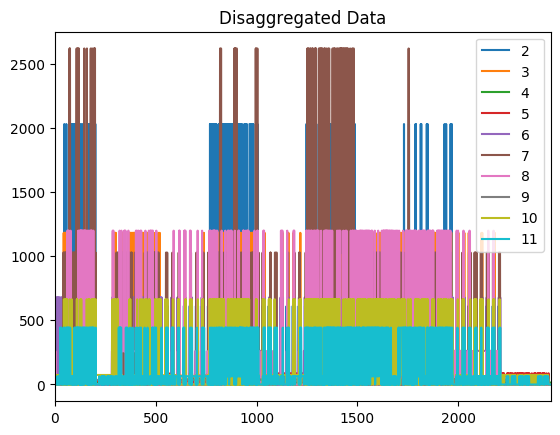

In [ ]:
# First, let's inspect the available appliances
from nilmtk import DataSet


# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")


import time
# Start of the measurement 
start_time = time.time()

# Define the experiment configuration
experiment1 = {
    'power': {
        'mains': ['active'],  # Simplify by using only active power
        'appliance': ['active']
    },
    'sample_rate':1, #Sampling of 1 second
      
     # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
          'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
      'methods': {
      'CO': CO({})
    },
    'site_only': True,  #  Change to True to use only the site
    'save_results': True,
    'results_dir': './results_nilm/',
    'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

# Execute the experiment
api_results_experiment_1 = API(experiment1)

# End of the measurement ment 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

### Only Graphic disaggregation   with 1 second of sampling, with harmonics

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : CO
...............CO disaggregate_chunk running.............
Estimating power demand for '2'
Estimating power demand for '3'
Estimating power demand for '4'
Estimating power demand for '5'
Estimating power demand for '6'
Estimating power demand for '7'
Estimating power demand for '8'
Estimating power demand for '9'
Estimating power demand for '10'
Estimating power demand for '11'
Execution time: 2.39 seconds


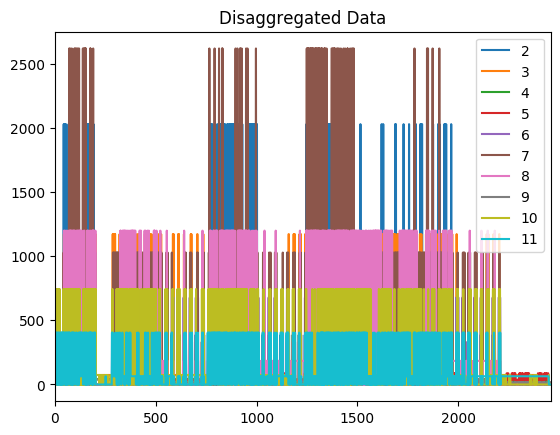

In [ ]:
# First, let's inspect the available appliances
from nilmtk import DataSet

# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")


import time
# Start of the measurement ment 
start_time = time.time()

# Define the experiment configuration
experiment1 = {
    'power': {
        'mains': ['active'],  # Simplify by using only active power
        'appliance': ['active']
    },
    'sample_rate':1, #Sampling of 16 seconds
      
     # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
          'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
      'methods': {
        'CO': CO({})
    },
    'site_only': True,  #  Change to True to use only the site
    'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

# Execute the experiment
api_results_experiment_1 = API(experiment1)

# End of the measurement ment 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

### CO with filter of 10 Watt without harmonics  1 second

In [11]:
import warnings
from nilmtk.api import API
from nilmtk.disaggregate import CO

warnings.filterwarnings("ignore")

import time
# Start of the measurement ment 
start_time = time.time()

experiment1 = {
    'power': {
        'mains': ['active'],
        'appliance': ['active']
    },
    'sample_rate': 1,
    'appliances': [2, 3, 4, 5, 6, 7, 8, 9, 10,11],
    'methods': {
        'CO': CO({'on_power_threshold': 10})  # Threshold of 10 
    },
    'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score', 'nde'],
    }
}

api_results_experiment_1 = API(experiment1)

print(api_results_experiment_1)

# End of the measurement ment 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : CO
...............CO disaggregate_chunk running.............
............  mae  ..............
            CO
2   554.800903
3   277.849182
4    19.620358
5    42.368549
6   211.028152
7   389.760101
8   405.562592
9    15.897922
10  170.696060
11  104.216614
............  rmse  ..............
            CO
2   933.052283
3   539.820254
4    24.641639
5    53.204408
6   333.643733
7   805.877705
8   643.951862
9    22.730822
10  334.979477
11  181.526610
............  f1score  ..............
          CO
2   0.508876
3   0.461609
4   0.768229
5   0.509132
6   0.267596
7   0.216561
8   0.425785
9   0.670106
10  0.409051
11  0.356518
............  nde  ..............
          CO
2   0.852229
3   1.211282
4   0.694985
5   0.942284
6   1.452373
7   1.209440
8   0.994439
9   0.785417
10  7.430715
11  4.194113
Execution time: 2.57 seconds


### Filter of 100 Watt, 1 second od sampling, without harmonics

In [ ]:
import warnings
from nilmtk.api import API
from nilmtk.disaggregate import CO

warnings.filterwarnings("ignore")

import time
# Start of the measurement ment 
start_time = time.time()

# Define the experiment configuration
experiment1 = {
    'power': {
        'mains': ['active'],
        'appliance': ['active']
    },
    'sample_rate': 1,
    'appliances': [2, 3, 4, 5, 6, 7, 8, 9, 10,11],
    'methods': {
        'CO': CO({'on_power_threshold': 100})  # Threshold of 10
    },
    'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score', 'nde'],
    }
}
# Execute the experiment
api_results_experiment_1 = API(experiment1)
# Print the results
print(api_results_experiment_1)

# End of the measurement ment 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

### With harmonics, filter of 10w  1 second

In [ ]:
import warnings
from nilmtk.api import API
from nilmtk.disaggregate import CO

warnings.filterwarnings("ignore")

import time
# Start of the measurement ment 
start_time = time.time()
# Define the experiment configuration
experiment1 = {
    'power': {
        'mains': ['active'],
        'appliance': ['active']
    },
    'sample_rate': 1,
    'appliances': [2, 3, 4, 5, 6, 7, 8, 9, 10,11],
    'methods': {
        'CO': CO({'on_power_threshold': 10})  # Threshold of
    },
    'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score', 'nde'],
    }
}
# Execute the experiment
api_results_experiment_1 = API(experiment1)
# Print the results 
print(api_results_experiment_1)

# End of the measurement ment 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : CO
...............CO disaggregate_chunk running.............
............  mae  ..............
            CO
2   563.600220
3   296.844086
4    15.853828
5    40.168869
6   232.894867
7   421.810608
8   409.757050
9    16.765997
10  148.949646
11  112.233055
............  rmse  ..............
            CO
2   942.656353
3   555.116795
4    21.250843
5    52.739581
6   357.294292
7   858.012311
8   643.407506
9    23.450677
10  283.306261
11  203.498349
............  f1score  ..............
          CO
2   0.516257
3   0.437724
4   0.815109
5   0.458978
6   0.249275
7   0.177500
8   0.397209
9   0.645475
10  0.356021
11  0.331946
............  nde  ..............
          CO
2   0.861001
3   1.245606
4   0.599352
5   0.934052
6   1.555325
7   1.287682
8   0.993599
9   0.810290
10  6.284469
11  4.701763
Execution time: 3.31 seconds


### CO with filter of 100w, harmonics , 1 second of sampling

In [ ]:
import warnings
from nilmtk.api import API
from nilmtk.disaggregate import CO

warnings.filterwarnings("ignore")


import time
# Start of the measurement ment 
start_time = time.time()

# Define the experiment configuration
experiment1 = {
    'power': {
        'mains': ['active'],
        'appliance': ['active']
    },
    'sample_rate': 1,
    'appliances': [2, 3, 4, 5, 6, 7, 8, 9, 10,11],
    'methods': {
        'CO': CO({'on_power_threshold': 100})  # Threshold of 100
    },
    'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score', 'nde'],
    }
}
# Execute the experiment
api_results_experiment_1 = API(experiment1)
# Print the results
print(api_results_experiment_1)

# End of the measurement ment 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : CO
...............CO disaggregate_chunk running.............
............  mae  ..............
            CO
2   556.041687
3   290.201324
4    20.725382
5    46.583237
6   228.709229
7   471.054535
8   407.447083
9    16.809128
10  149.226715
11  120.216347
............  rmse  ..............
            CO
2   950.925503
3   550.364056
4    24.695257
5    57.396425
6   352.805475
7   894.341587
8   633.055487
9    22.242241
10  279.744498
11  214.476242
............  f1score  ..............
          CO
2   0.515873
3   0.365217
4   0.792816
5   0.424193
6   0.239880
7   0.177827
8   0.453684
9   0.623250
10  0.358590
11  0.398604
............  nde  ..............
          CO
2   0.868554
3   1.234941
4   0.696498
5   1.016527
6   1.535785
7   1.342204
8   0.977612
9   0.768535
10  6.205459
11  4.955403
Execution time: 3.11 seconds


# MEAN Algorithm

### Without harmonics, 1 second of sampling

In [ ]:
from nilmtk.api import API
from nilmtk.disaggregate import Mean
import warnings
warnings.filterwarnings("ignore")


import time
# Start of the measurement ment 
start_time = time.time()

# Define the experiment configuration
experiment1 = {
    'power': {
        'mains': ['active'],
        'appliance': ['active']
    },
    'sample_rate': 1,
    'appliances': [2, 3, 4, 5, 6, 7, 8, 9, 10,11],
    'methods': {
        'Mean': Mean(params={})  # Provides an empty dictionary as the ‘params’ argument.
    },
    'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
       'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}
# Execute the experiment
api_results_experiment_1 = API(experiment1)
# Print the results
print(api_results_experiment_1)

# End of the measurement ment 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : Mean
............  mae  ..............
          Mean
2   910.207520
3   217.588898
4    20.893730
5    41.338013
6   250.075256
7   398.601715
8   496.986938
9    15.888822
10   31.911043
11   26.843023
............  rmse  ..............
          Mean
2   935.220562
3   416.913342
4    21.061547
5    41.420241
6   259.786736
7   649.806389
8   541.388724
9    16.376611
10   36.661904
11   35.863550
............  f1score  ..............
        Mean
2   0.455259
3   0.563504
4   0.945564
5   0.580906
6   0.208303
7   0.122137
8   0.455744
9   0.740722
10  0.454774
11  0.456713
............  nde  ..............
        Mean
2   0.854209
3   0.935496
4   0.594014
5   0.733579
6   1.130869
7   0.975212
8   0.836054
9   0.565860
10  0.813256
11  0.828616
Execution time: 1.31 seconds


### Without harmonics, filter of 10 W,  1 second

In [ ]:
from nilmtk.api import API
from nilmtk.disaggregate import Mean
import warnings
warnings.filterwarnings("ignore")


import time
# Start of the measurement ment 
start_time = time.time()

# Define the experiment configuration
experiment1 = {
    'power': {
        'mains': ['active'],
        'appliance': ['active']
    },
    'sample_rate': 1,
    'appliances': [2, 3, 4, 5, 6, 7, 8, 9, 10,11],
    'methods': {
        'Mean': Mean(params={'on_power_threshold': 10})  # Provides an empty dictionary as the ‘params’ argument.
    },
    'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
       'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}
# Execute the experiment
api_results_experiment_1 = API(experiment1)
# Print the results
print(api_results_experiment_1)

# End of the measurement ment 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")
    

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : Mean
............  mae  ..............
          Mean
2   910.207520
3   217.588898
4    20.893730
5    41.338013
6   250.075256
7   398.601715
8   496.986938
9    15.888822
10   31.911043
11   26.843023
............  rmse  ..............
          Mean
2   935.220562
3   416.913342
4    21.061547
5    41.420241
6   259.786736
7   649.806389
8   541.388724
9    16.376611
10   36.661904
11   35.863550
............  f1score  ..............
        Mean
2   0.455259
3   0.563504
4   0.945564
5   0.580906
6   0.208303
7   0.122137
8   0.455744
9   0.740722
10  0.454774
11  0.456713
............  nde  ..............
        Mean
2   0.854209
3   0.935496
4   0.594014
5   0.733579
6   1.130869
7   0.975212
8   0.836054
9   0.565860
10  0.813256
11  0.828616
Execution time: 0.89 seconds


### Without harmonics, filter of 100 Watt  1 second

In [ ]:
from nilmtk.api import API
from nilmtk.disaggregate import Mean
import warnings
warnings.filterwarnings("ignore")


import time
# Start of the measurement ment 
start_time = time.time()

# Define the experiment configuration
experiment1 = {
    'power': {
        'mains': ['active'],
        'appliance': ['active']
    },
    'sample_rate': 1,
    'appliances': [2, 3, 4, 5, 6, 7, 8, 9, 10,11],
    'methods': {
        'Mean': Mean(params={'on_power_threshold': 100})  # Provides an empty dictionary as the ‘params’ argument.
    },
    'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
       'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}
# Execute the experiment
api_results_experiment_1 = API(experiment1)
# Print the results
print(api_results_experiment_1)

# End of the measurement ment 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : Mean
............  mae  ..............
          Mean
2   910.207520
3   217.588898
4    20.893730
5    41.338013
6   250.075256
7   398.601715
8   496.986938
9    15.888822
10   31.911043
11   26.843023
............  rmse  ..............
          Mean
2   935.220562
3   416.913342
4    21.061547
5    41.420241
6   259.786736
7   649.806389
8   541.388724
9    16.376611
10   36.661904
11   35.863550
............  f1score  ..............
        Mean
2   0.455259
3   0.563504
4   0.945564
5   0.580906
6   0.208303
7   0.122137
8   0.455744
9   0.740722
10  0.454774
11  0.456713
............  nde  ..............
        Mean
2   0.854209
3   0.935496
4   0.594014
5   0.733579
6   1.130869
7   0.975212
8   0.836054
9   0.565860
10  0.813256
11  0.828616
Execution time: 0.93 seconds


## USING  HARMONICS

### Using harmonics , without filter , 1 second of sampling

In [ ]:
from nilmtk.api import API
from nilmtk.disaggregate import Mean
import warnings
warnings.filterwarnings("ignore")


import time
# Start of the measurement ment 
start_time = time.time()

# Define the experiment configuration
experiment1 = {
    'power': {
        'mains': ['active'],
        'appliance': ['active']
    },
    'sample_rate': 1,
    'appliances': [2, 3, 4, 5, 6, 7, 8, 9, 10,11],
    'methods': {
        'Mean': Mean(params={})  # Provides an empty dictionary as the ‘params’ argument.
    },
    'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
       'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}
# Execute the experiment
api_results_experiment_1 = API(experiment1)
# Print the results
print(api_results_experiment_1)

# End of the measurement ment 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : Mean
............  mae  ..............
          Mean
2   910.207520
3   217.588898
4    20.893730
5    41.338013
6   250.075256
7   398.601715
8   496.986938
9    15.888822
10   31.911043
11   26.843023
............  rmse  ..............
          Mean
2   935.220562
3   416.913342
4    21.061547
5    41.420241
6   259.786736
7   649.806389
8   541.388724
9    16.376611
10   36.661904
11   35.863550
............  f1score  ..............
        Mean
2   0.455259
3   0.563504
4   0.945564
5   0.580906
6   0.208303
7   0.122137
8   0.455744
9   0.740722
10  0.454774
11  0.456713
............  nde  ..............
        Mean
2   0.854209
3   0.935496
4   0.594014
5   0.733579
6   1.130869
7   0.975212
8   0.836054
9   0.565860
10  0.813256
11  0.828616
Execution time: 1.22 seconds


### Only graphic disaggregation , harmonics support, without any filter and 1 second of sampling

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : Mean
Execution time: 6.35 seconds


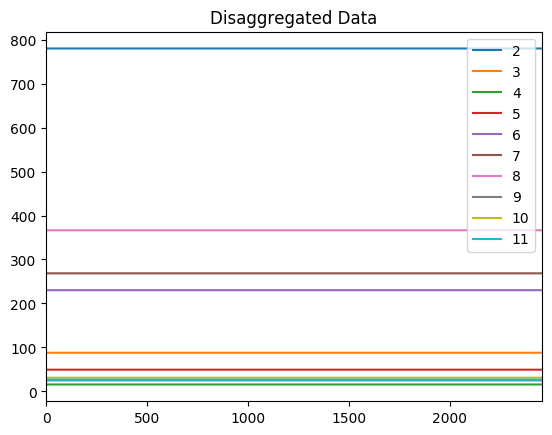

In [ ]:
from nilmtk.api import API
from nilmtk.disaggregate import Mean
import warnings
warnings.filterwarnings("ignore")


import time
# Start of the measurement ment 
start_time = time.time()


# Define the experiment configuration
experiment1 = {
    'power': {
        'mains': ['active'],
        'appliance': ['active']
    },
    'sample_rate': 1,
    'appliances': [2, 3, 4, 5, 6, 7, 8, 9, 10,11],
    'methods': {
        'Mean': Mean(params={})  # Provides an empty dictionary as the ‘params’ argument.
    },
    'site_only': True,  #  Change to True to use only the site
    'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
       'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}
# Execute the experiment
api_results_experiment_1 = API(experiment1)
# Print the results
print(api_results_experiment_1)

# End of the measurement ment 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

# Hart85 Algorithm

### Without harmonics , without any filter and 1 second of sampling

In [ ]:

from nilmtk.api import API
from nilmtk.disaggregate import Hart85
import warnings
warnings.filterwarnings("ignore")


import time
# Start of the measurement ment 
start_time = time.time()


# Define the experiment configuration
experiment1 = {
    'power': {
        'mains': ['active'],
        'appliance': ['active']
    },
    'sample_rate': 1,
    'appliances': [2, 3, 4, 5, 6, 7, 8, 9, 10,11],
    'methods': {
        'Hart85': Hart85(params={})  # Provides an empty dictionary as the ‘params’ argument.
    },
    'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
       'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

# Execute the experiment
api_results_experiment_1 = API(experiment1)
# Print the results
print(api_results_experiment_1)

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")


Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : Hart85
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
............  mae  ..............
          Mean
2   423.290283
3   184.941437
4    33.723259
5    39.599049
6    83.128746
7   174.744675
8   426.208221
9    23.884373
10   26.614500
11   24.342443
............  rmse  ..............
          Mean
2   641.182623
3   445.660062
4    35.456341
5    56.463242
6   229.723178
7   666.322932
8   634.901026
9    28.941083
10   45.080385
11   43.281288
............  f1score  ..............
        Mean
2   0.807350
3   0.000000
4   0.000000
5   0.000000
6   0.000000
7   0.000000
8   0.330817
9   0.000000
10  0.000000
11  0.000000
............  nde  ..............
        Mean
2   0.585642
3   1.000000
4   1.000000
5   1.000000
6   1.000000
7   1.000000

### With harmonics support, without any filter and 1 second of sampling 

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : Hart85
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
Execution time: 8.39 seconds


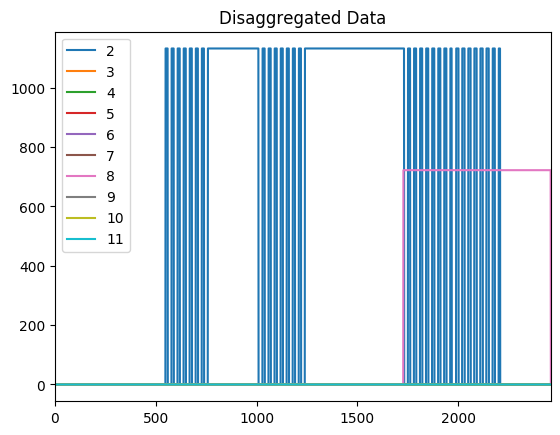

In [ ]:
from nilmtk.api import API
from nilmtk.disaggregate import Hart85
import warnings
warnings.filterwarnings("ignore")


import time
# Start of the measurement 
start_time = time.time()

# Define the experiment configuration
experiment1 = {
    'power': {
        'mains': ['active'],
        'appliance': ['active']
    },
    'sample_rate': 1,
    'appliances': [2, 3, 4, 5, 6, 7, 8, 9, 10,11],
    'methods': {
        'Hart85': Hart85(params={})  # Provides an empty dictionary as the ‘params’ argument.
    },
   'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
     'site_only':True,#  Change to True to use only the site
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
       'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}
# Execute the experiment
api_results_experiment_1 = API(experiment1)
# Print the results
print(api_results_experiment_1)

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

# FHMM_Exact

### Without harmonics , without any filter and 1 second of sampling 

In [ ]:
from nilmtk.api import API
from nilmtk.disaggregate import FHMMExact
import warnings
warnings.filterwarnings("ignore")


import time
# Start of the measurement 
start_time = time.time()


# Define the experiment configuration
experiment1 = {
    'power': {
        'mains': ['active'],
        'appliance': ['active']
    },
    'sample_rate': 1,
    'appliances': [2, 3, 4, 5, 6, 7, 8, 9, 10,11],
    'methods': {
        'FHMMExact': FHMMExact(params={})  # Provides an empty dictionary as the ‘params’ argument.
    },
    'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
       'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}
# Execute the experiment
api_results_experiment_1 = API(experiment1)
# Print the results
print(api_results_experiment_1)

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : FHMMExact
............  mae  ..............
     FHMMExact
2   550.280090
3   331.964905
4    16.387514
5    44.097252
6   292.890350
7   373.335114
8   568.818542
9    15.874794
10   31.509975
11   22.036087
............  rmse  ..............
      FHMMExact
2   1049.270044
3    581.408822
4     23.571315
5     59.742551
6    442.865474
7    984.864331
8    822.092756
9     16.381929
10    36.376700
11    41.836058
............  f1score  ..............
    FHMMExact
2    0.413252
3    0.259629
4    0.716482
5    0.396905
6    0.333748
7    0.221239
8    0.072727
9    0.740722
10   0.454774
11   0.589857
............  nde  ..............
    FHMMExact
2    0.958380
3    1.304602
4    0.664798
5    1.058079
6    1.927822
7    1.478059
8    1.269538
9    0.566044
10   0.806930
11   0.966608
Execution time: 66.31 seconds


### With harmonics , without any filter and 1 second of sampling

In [ ]:
from nilmtk.api import API
from nilmtk.disaggregate import FHMMExact
import warnings
warnings.filterwarnings("ignore")


import time
# Start of the measurement 
start_time = time.time()


# Define the experiment configuration
experiment1 = {
    'power': {
        'mains': ['active'],
        'appliance': ['active']
    },
    'sample_rate': 1,
    'appliances': [2, 3, 4, 5, 6, 7, 8, 9, 10,11],
    'methods': {
        'FHMMExact': FHMMExact(params={})  # Provides an empty dictionary as the ‘params’ argument.
    },
    'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
       'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}
# Execute the experiment
api_results_experiment_1 = API(experiment1)
# Print the results
print(api_results_experiment_1)

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : FHMMExact
............  mae  ..............
     FHMMExact
2   229.351379
3   281.296936
4    21.117449
5    41.268909
6   249.929977
7   415.604950
8   262.023438
9    19.440895
10   32.175884
11   28.977394
............  rmse  ..............
      FHMMExact
2    670.962182
3    518.098024
4     26.965221
5     41.332682
6    259.679625
7   1038.439394
8    553.098319
9     25.093412
10    49.656884
11    46.221391
............  f1score  ..............
    FHMMExact
2    0.783455
3    0.216216
4    0.531738
5    0.580906
6    0.208303
7    0.307420
8    0.582822
9    0.273931
10   0.262764
11   0.162319
............  nde  ..............
    FHMMExact
2    0.612842
3    1.162541
4    0.760519
5    0.732028
6    1.130402
7    1.558463
8    0.854136
9    0.867052
10   1.101519
11   1.067930
Execution time: 61.76 seconds


### Only graphic disaggregation  with harmonics , without any filter and 1 second of sampling

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : FHMMExact
Execution time: 25.67 seconds


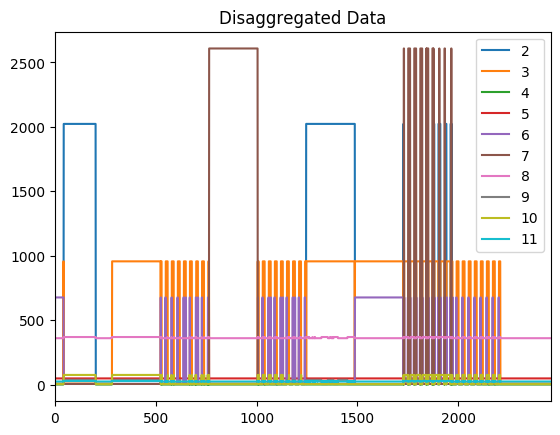

In [ ]:
from nilmtk.api import API
from nilmtk.disaggregate import FHMMExact
import warnings
warnings.filterwarnings("ignore")


import time
# Start of the measurement 
start_time = time.time()

# Define the experiment configuration   
experiment1 = {
    'power': {
        'mains': ['active'],
        'appliance': ['active']
    },
    'sample_rate': 1,
    'appliances': [2, 3, 4, 5, 6, 7, 8, 9, 10,11],
    'methods': {
        'FHMMExact': FHMMExact(params={})  # Provides an empty dictionary as the ‘params’ argument.
    },
    'site_only': True,  #  Change to True to use only the site
    'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
       'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}
# Execute the experiment
api_results_experiment_1 = API(experiment1)
# Print the results
print(api_results_experiment_1)

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

# DEEP LEARNING ALGORITHMS

# DAE 

###  Only graphic disaggregation, with harmonics , without any filter and 1 second of sampling

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : DAE
Execution time: 240.30 seconds


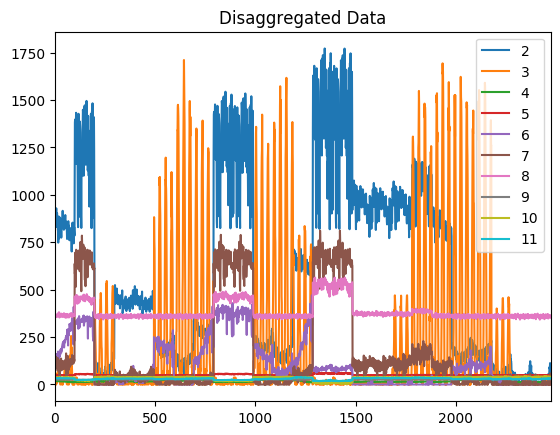

In [ ]:
from nilmtk_contrib.disaggregate import DAE


from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")


import time
# Start of the measurement 
start_time = time.time()

# Define the experiment configuration
experiment1 = {
    'power': {'mains': ['apparent','active'],'appliance': ['apparent','active']},
    'sample_rate': 1,# Sampling of 1 second
    # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
    'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
    'methods': {
        'DAE':DAE({'window_size': 99})  # Provides an empty dictionary as the ‘params’ argument.
    },
    'site_only': True,# Change to True to use only the site 
    'save_results': True,
    'results_dir': './results_nilm/',  
     'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
       'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}
# Execute the experiment
api_results_experiment_1 = API(experiment1)
# Print the results
print(api_results_experiment_1)

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

### Metrics  using harmonics , without any filter and 1 second of sampling

In [ ]:
from nilmtk_contrib.disaggregate import DAE


from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")


import time
# Start of the measurement 
start_time = time.time()

# Define the experiment configuration
experiment1 = {
    'power': {'mains': ['active'],'appliance': ['active']},
       'sample_rate': 1, # Sampling of 1 second
    # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
    'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
    'methods': {
        'DAE':DAE({'window_size': 99})  # Provides an empty dictionary as the ‘params’ argument.
    },
    'site_only': False,
    'save_results': False,
    'results_dir': './results_nilm/',  
      'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
       'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}
# Execute the experiment
api_results_experiment_1 = API(experiment1)
# Print the results
print(api_results_experiment_1)

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : DAE
............  mae  ..............
           DAE
2   480.535583
3   108.508438
4    19.608286
5    41.867847
6   217.369461
7   280.535431
8   320.891052
9    14.586821
10   30.190685
11   27.550863
............  rmse  ..............
           DAE
2   667.635380
3   218.197212
4    20.541669
5    42.096009
6   270.466336
7   615.924661
8   426.413110
9    15.742215
10   35.614479
11   36.178509
............  f1score  ..............
         DAE
2   0.539435
3   0.601363
4   0.888939
5   0.580906
6   0.217908
7   0.150870
8   0.566114
9   0.740722
10  0.474443
11  0.456713
............  nde  ..............
         DAE
2   0.609803
3   0.489605
4   0.579351
5   0.745547
6   1.177358
7   0.924364
8   0.658499
9   0.543940
10  0.790022
11  0.835893
Execution time: 310.57 seconds


## Study of effect of the filters

### Filter of 100 Watt

In [ ]:
params={'on_power_threshold': 100}
from nilmtk_contrib.disaggregate import DAE


from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")


import time
# Start of the measurement 
start_time = time.time()

#  Define the experiment configuration
experiment1 = {
    'power': {'mains': ['active'],'appliance': ['active']},
    'sample_rate': 1, # Sampling of 1 second
    # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
    'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
    'methods': {
        'DAE':DAE({'window_size': 99})  # Provides an empty dictionary as the ‘params’ argument.
    },
    'site_only': False,
    'save_results': False,
    'results_dir': './results_nilm/',  
      'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
       'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}
# Execute the experiment
api_results_experiment_1 = API(experiment1)
# Print the results
print(api_results_experiment_1)

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : DAE
............  mae  ..............
           DAE
2   552.611511
3    99.792458
4    18.824528
5    41.396927
6   129.308090
7   300.668976
8   492.663513
9    14.760322
10   29.958050
11   27.941029
............  rmse  ..............
           DAE
2   709.213517
3   223.831750
4    19.648265
5    41.683979
6   186.282883
7   621.096837
8   530.968308
9    15.683101
10   35.553186
11   37.097672
............  f1score  ..............
         DAE
2   0.472929
3   0.698046
4   0.925164
5   0.580906
6   0.312739
7   0.159056
8   0.455744
9   0.742623
10  0.483311
11  0.456713
............  nde  ..............
         DAE
2   0.647780
3   0.502248
4   0.554154
5   0.738250
6   0.810902
7   0.932126
8   0.819962
9   0.541898
10  0.788662
11  0.857130
Execution time: 140.29 seconds


### Filter of 50 Watt

In [ ]:
from nilmtk_contrib.disaggregate import DAE
from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")

import time
# Start of the measurement 
start_time = time.time()

# Define the experiment configuration
experiment1 = {
    'power': {'mains': ['active'],'appliance': ['active']},
    'sample_rate': 1, # Sampling of 1 second
    # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
    'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
    'methods': {
        'DAE':DAE({'window_size': 99, 'on_power_threshold': 50})},# size of window is 99 and threshold of 50 watt
    },
    'site_only': False, # Change to True to use only the site
    'save_results': False, # False to not save results
    'results_dir': './results_nilm/',  # Directory to save results
      'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
       'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}
# Execute the experiment
api_results_experiment_1 = API(experiment1)
# Print the results
print(api_results_experiment_1)

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : DAE
............  mae  ..............
           DAE
2   485.929871
3   130.120087
4    21.284824
5    41.402653
6   205.281662
7   279.063080
8   367.974915
9    14.729148
10   30.752279
11   27.117603
............  rmse  ..............
           DAE
2   691.534096
3   234.672653
4    21.858061
5    41.498644
6   275.432955
7   620.062799
8   456.139730
9    15.827415
10   35.829036
11   35.541291
............  f1score  ..............
         DAE
2   0.534464
3   0.435461
4   0.892599
5   0.580906
6   0.218055
7   0.162815
8   0.483678
9   0.740722
10  0.475690
11  0.456713
............  nde  ..............
         DAE
2   0.631632
3   0.526573
4   0.616478
5   0.734967
6   1.198978
7   0.930574
8   0.704406
9   0.546884
10  0.794781
11  0.821170
Execution time: 221.97 seconds


### Without harmonics , without any filter and 1 second of sampling

In [ ]:
from nilmtk_contrib.disaggregate import DAE

from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")


import time
# Start of the measurement 
start_time = time.time()

# Define the experiment configuration
experiment1 = {
    'power': {'mains': ['active'],'appliance': ['active']},
       'sample_rate': 1, # Sampling of 1 second
    # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
    'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
    'methods': {
        'DAE':DAE({'window_size': 99})  # Provides an empty dictionary as the ‘params’ argument.
    },
    'save_results': False, # False to not save results
    'results_dir': './results_nilm/',  # Directory to save results
      'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
       'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}
# Execute the experiment
api_results_experiment_1 = API(experiment1)
# Print the results
print(api_results_experiment_1)

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : DAE
............  mae  ..............
           DAE
2   451.660614
3    99.657837
4    21.016653
5    41.399403
6   217.363434
7   297.571075
8   493.610046
9    14.805759
10   30.102411
11   27.354853
............  rmse  ..............
           DAE
2   647.830731
3   223.356218
4    21.570192
5    41.681677
6   248.750715
7   620.849443
8   530.726448
9    15.684292
10   35.625680
11   36.087782
............  f1score  ..............
         DAE
2   0.590631
3   0.688163
4   0.909696
5   0.580906
6   0.230274
7   0.149686
8   0.455744
9   0.740722
10  0.482667
11  0.456713
............  nde  ..............
         DAE
2   0.591714
3   0.501181
4   0.608359
5   0.738209
6   1.082828
7   0.931755
8   0.819588
9   0.541939
10  0.790270
11  0.833796
Execution time: 138.07 seconds


# RNN

### Metrics with harmonics, without filter and 1 second of samppling

In [ ]:
from nilmtk_contrib.disaggregate import RNN

from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")

import time
# Start of the measurement 
start_time = time.time()

# Define the experiment configuration
experiment1 = {
    'power': {'mains': ['active'],'appliance': ['active']},
    'sample_rate': 1,# Sampling of 1 second
    'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
    'methods': {"RNN":RNN({})},
    'site_only': False,# Change to True to use only the site
    'save_results': False, # False to not save results
    'results_dir': './results_nilm/',  # Directory to save results
      'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
       'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}
# Execute the experiment
api_results_experiment_1 = API(experiment1)
# Print the results
print(api_results_experiment_1)

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

### Metrics with harmonics , with filter of 100 Watt and 1 second of sampling

In [ ]:
from nilmtk_contrib.disaggregate import RNN


from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")

import time
# Start of the measurement 
start_time = time.time()
# Define the experiment configuration
experiment1 = {
    'power': {'mains': ['active'],'appliance': ['active']},
    'sample_rate': 1,# Sampling of 1 second
    'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
    'methods': {"RNN":RNN({'on_power_threshold': 100})},# Threshold of 100 Watt
    'site_only': False, # Change to True to use only the site
    'save_results': False,# False to not save results
    'results_dir': './results_nilm/',  # Directory to save results
      'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
       'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}
# Execute the experiment
api_results_experiment_1 = API(experiment1)
# Print the results
print(api_results_experiment_1)

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : RNN
............  mae  ..............
           RNN
2   208.538193
3    68.064644
4    20.354610
5    41.782928
6   129.771500
7   321.166107
8   370.765991
9    12.945055
10   30.495941
11   17.471363
............  rmse  ..............
           RNN
2   370.332093
3   171.491271
4    21.095297
5    42.126610
6   188.175253
7   611.592976
8   480.939673
9    15.482114
10   35.872198
11   30.975390
............  f1score  ..............
         RNN
2   0.687589
3   0.824302
4   0.873563
5   0.580906
6   0.248897
7   0.204082
8   0.528192
9   0.748260
10  0.489355
11  0.495394
............  nde  ..............
         RNN
2   0.338253
3   0.384803
4   0.594965
5   0.746089
6   0.819139
7   0.917863
8   0.742704
9   0.534953
10  0.795739
11  0.715676
Execution time: 5213.12 seconds


### Metrics with harmonics , with filter of 50 Watt and 1 second of sampling

In [ ]:
from nilmtk_contrib.disaggregate import RNN
from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")

import time
# Start of the measurement 
start_time = time.time()
# Define the experiment configuration
experiment1 = {
    'power': {'mains': ['active'],'appliance': ['active']},
    'sample_rate': 1,# Sampling of 1 second
    'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
    'methods': {"RNN":RNN({'on_power_threshold': 50})},# Threshold of 50 Watt
     'site_only': False,# Change to True to use only the site
    'save_results': True,# False to not save results
    'results_dir': './results_nilm/',  # Directory to save results
      'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
       'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}
# Execute the experiment
api_results_experiment_1 = API(experiment1)
# Print the results
print(api_results_experiment_1)

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : RNN
............  mae  ..............
           RNN
2   151.732361
3    79.246902
4    20.304817
5    41.924339
6    81.889572
7   316.686676
8   265.208649
9    12.936161
10   30.699736
11   17.743055
............  rmse  ..............
           RNN
2   322.171550
3   182.719260
4    21.400932
5    42.307637
6   153.017475
7   615.974203
8   339.217827
9    15.377980
10   36.180567
11   31.518341
............  f1score  ..............
         RNN
2   0.834873
3   0.769784
4   0.873304
5   0.580906
6   0.332160
7   0.164018
8   0.463721
9   0.742664
10  0.454774
11  0.515763
............  nde  ..............
         RNN
2   0.294264
3   0.409997
4   0.603585
5   0.749295
6   0.666095
7   0.924438
8   0.523846
9   0.531355
10  0.802579
11  0.728221
Execution time: 6233.07 seconds


### Metrics  without harmonics , without any filter and 1 second of sampling

In [ ]:
from nilmtk_contrib.disaggregate import RNN

from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")

import time
# Start of the measurement 
start_time = time.time()

experiment1 = {
    'power': {'mains': ['active'],'appliance': ['active']},
    'sample_rate': 1,# Sampling of 1 second
    'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
    'methods': {"RNN":RNN({})}, # Provides an empty dictionary as the ‘params’ argument.
       'site_only': False,# Change to True to use only the site
    'save_results': False,# False to not save results
    'results_dir': './results_nilm/',  # Directory to save results
      'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
       'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}
# Execute the experiment
api_results_experiment_1 = API(experiment1)
# Print the results
print(api_results_experiment_1)

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : RNN
............  mae  ..............
           RNN
2   196.900467
3    74.400345
4    20.854811
5    41.747505
6    98.113869
7   296.649689
8   333.203796
9    12.767664
10   31.067085
11   20.258455
............  rmse  ..............
           RNN
2   361.173932
3   180.131278
4    21.784054
5    42.044542
6   166.704120
7   605.701814
8   447.844141
9    15.633618
10   36.150287
11   33.430884
............  f1score  ..............
         RNN
2   0.818594
3   0.895296
4   0.805752
5   0.580906
6   0.347719
7   0.122418
8   0.636484
9   0.751961
10  0.454774
11  0.512857
............  nde  ..............
         RNN
2   0.329888
3   0.404190
4   0.614391
5   0.744636
6   0.725674
7   0.909021
8   0.691595
9   0.540188
10  0.801907
11  0.772410
Execution time: 5456.35 seconds


# SEQ2POINT

###  Metrics with harmonics , without any filter and 1 second of sampling

In [ ]:
from nilmtk_contrib.disaggregate import Seq2Point
from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")


import time
# Start of the measurement 
start_time = time.time()
# Define the experiment configuration
experiment1 = {
    'power': {'mains': ['active'],'appliance': ['active']},# # 'mains' and 'appliance' are the keys for the power data
     'sample_rate': 1,# Sampling of 1 second
    'appliances': [2, 3, 4, 5, 6, 7, 8, 9, 10,11],  # Volvemos a los ordinales
    #'methods': {"CO":CO({})},#ok
    'methods': {"SEQ2POINT": Seq2Point({'sequence_length': 99, 'n_epochs': 10, 'batch_size': 512})},  # We add sequence_length, n_epochs, and batch_size parameters 
         'site_only': False, # Change to True to use only the site
    'save_results': False,# False to not save results
    'results_dir': './results_nilm/',  # Directory to save results
      'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
       'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}
# Execute the experiment
api_results_experiment_1 = API(experiment1)
# Print the results
print(api_results_experiment_1)

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : Seq2Point
............  mae  ..............
     SEQ2POINT
2   285.621582
3    55.760418
4    22.568613
5    28.888041
6    87.953903
7   305.066925
8   273.684753
9    14.448309
10   29.691282
11   12.613994
............  rmse  ..............
     SEQ2POINT
2   479.888333
3   156.115855
4    23.254311
5    39.022475
6   147.499133
7   610.651471
8   359.922995
9    18.424395
10   35.051347
11   27.940431
............  f1score  ..............
    SEQ2POINT
2    0.574030
3    0.849846
4    0.799608
5    0.655032
6    0.311208
7    0.162272
8    0.540380
9    0.685021
10   0.454774
11   0.524874
............  nde  ..............
    SEQ2POINT
2    0.438319
3    0.350303
4    0.655858
5    0.691113
6    0.642073
7    0.916450
8    0.555820
9    0.636617
10   0.777530
11   0.645554
Execution time: 1880.32 seconds


## We study the efect of power  filters 

### Power filter of 100 Watt

In [ ]:
from nilmtk_contrib.disaggregate import Seq2Point
from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")

import time
# Start of the measurement 
start_time = time.time()

experiment1 = {
    'power': {'mains': ['active'],'appliance': ['active']},
    #'power': {'mains': ['active'], 'appliance': ['active']},
    'sample_rate': 1,
    'appliances': [2, 3, 4, 5, 6, 7, 8, 9, 10,11],  # Volvemos a los ordinales
    #'methods': {"CO":CO({})},#ok
    'methods': {"SEQ2POINT": Seq2Point({'sequence_length': 99, 'n_epochs': 10, 'batch_size': 512,'on_power_threshold': 100})}, # Añadimos algunos parámetros
         'site_only': False,
    'save_results': False,
    'results_dir': './results_nilm/',  
      'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
       'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

api_results_experiment_1 = API(experiment1)
print(api_results_experiment_1)

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : Seq2Point
............  mae  ..............
     SEQ2POINT
2   282.783752
3    42.478867
4    20.563135
5    41.383125
6   111.784805
7   239.343399
8   358.240967
9    13.913086
10   32.030582
11   15.414557
............  rmse  ..............
     SEQ2POINT
2   487.845935
3   115.443045
4    21.536917
5    41.506977
6   163.862390
7   600.286078
8   440.324117
9    17.372159
10   36.288645
11   29.926020
............  f1score  ..............
    SEQ2POINT
2    0.659691
3    0.860455
4    0.867664
5    0.580906
6    0.277401
7    0.343716
8    0.501728
9    0.709555
10   0.454774
11   0.523553
............  nde  ..............
    SEQ2POINT
2    0.445587
3    0.259038
4    0.607421
5    0.735115
6    0.713304
7    0.900894
8    0.679982
9    0.600259
10   0.804976
11   0.691431
Execution time: 1443.94 seconds


### Power filter of 50 Watt

In [13]:
from nilmtk_contrib.disaggregate import Seq2Point
from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")


import time
# Start of the measurement 
start_time = time.time()

experiment1 = {
    'power': {'mains': ['active'],'appliance': ['active']},
    'sample_rate': 1,
    'appliances': [2, 3, 4, 5, 6, 7, 8, 9, 10,11],  # Volvemos a los ordinales
    'methods': {"SEQ2POINT": Seq2Point({'sequence_length': 99, 'n_epochs': 10, 'batch_size': 512,'on_power_threshold': 50})}, # Añadimos algunos parámetros
         'site_only': False,
    'save_results': False,
    'results_dir': './results_nilm/',  
      'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
       'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

api_results_experiment_1 = API(experiment1)
print(api_results_experiment_1)

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : Seq2Point
............  mae  ..............
     SEQ2POINT
2   300.414368
3    54.352959
4    20.471344
5    32.245712
6    97.521782
7   263.368225
8   271.814636
9    16.208155
10   23.077772
11   13.955059
............  rmse  ..............
     SEQ2POINT
2   524.763101
3   135.823178
4    21.457986
5    41.714555
6   175.344945
7   618.454576
8   361.486439
9    19.978302
10   29.989971
11   29.608983
............  f1score  ..............
    SEQ2POINT
2    0.565082
3    0.842059
4    0.875429
5    0.594975
6    0.282051
7    0.209150
8    0.600496
9    0.663119
10   0.454774
11   0.530999
............  nde  ..............
    SEQ2POINT
2    0.479307
3    0.304769
4    0.605195
5    0.738791
6    0.763288
7    0.928160
8    0.558235
9    0.690309
10   0.665255
11   0.684106
Execution time: 1698.38 seconds


### Metrics without harmonics , without any filter and 1 second of sampling 

In [ ]:
from nilmtk_contrib.disaggregate import Seq2Point
from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")


import time
# Start of the measurement 
start_time = time.time()

experiment1 = {
    'power': {'mains': ['active'],'appliance': ['active']},
     'sample_rate': 1,
    'appliances': [2, 3, 4, 5, 6, 7, 8, 9, 10,11],  # Volvemos a los ordinales
    'methods': {"SEQ2POINT": Seq2Point({'sequence_length': 99, 'n_epochs': 10, 'batch_size': 512})}, # Añadimos algunos parámetros
         'site_only': False,# Change to True to use only the site
    'save_results': False,# False to not save results
    'results_dir': './results_nilm/',  # Directory to save results
      'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
       'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

api_results_experiment_1 = API(experiment1)
print(api_results_experiment_1)

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : Seq2Point
............  mae  ..............
     SEQ2POINT
2   446.458038
3    41.312290
4    19.579382
5    41.560440
6   121.485039
7   312.990845
8    68.748306
9    15.870220
10   29.018597
11   15.545036
............  rmse  ..............
     SEQ2POINT
2   595.577608
3   127.103915
4    21.443252
5    41.803127
6   177.998420
7   629.112420
8   134.328531
9    19.717589
10   33.606705
11   29.120121
............  f1score  ..............
    SEQ2POINT
2    0.496916
3    0.929342
4    0.810968
5    0.580906
6    0.279433
7    0.199253
8    0.630065
9    0.690779
10   0.454774
11   0.514669
............  nde  ..............
    SEQ2POINT
2    0.543987
3    0.285204
4    0.604779
5    0.740360
6    0.774839
7    0.944155
8    0.207440
9    0.681301
10   0.745484
11   0.672811
Execution time: 1431.18 seconds


# Only disaggregation graph  with harmonics, without any filter and 1 second of sampling 

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : Seq2Point
Execution time: 1678.36 seconds


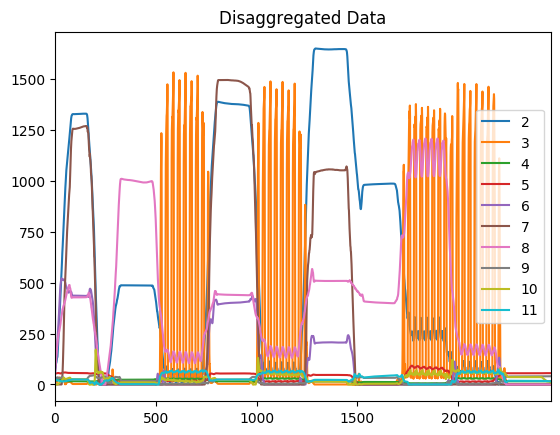

In [ ]:
from nilmtk_contrib.disaggregate import Seq2Point
from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")


import time
# Start of the measurement 
start_time = time.time()

experiment1 = {
    'power': {'mains': ['apparent','active'],'appliance': ['apparent','active']},
    'sample_rate': 1, # Sampling of 1 second
    'appliances': [2, 3, 4, 5, 6, 7, 8, 9, 10,11], 
    'methods': {"SEQ2POINT": Seq2Point({'sequence_length': 99, 'n_epochs': 10, 'batch_size': 512})}, # we add some parameters
    'site_only': True,# Change to True to use only the site 
    'train': {    
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {1: {'start_time': '2023-06-09 09:34:00', 'end_time': '2023-06-09 12:54:00'}}
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {1: {'start_time': '2023-06-09 12:55:00', 'end_time': '2023-06-09 13:36:00'}}
            }
        },
        'metrics': ['mae','rmse','f1score','nde']
    }
}

try:
  # Execute the experiment
   api_results_experiment_1 = API(experiment1)
   # Print the results
   print(api_results_experiment_1)
except Exception as e:
      # Handle any exceptions that occur during the API call
      print(f"Error:{e}")  
        
                
# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

# SEQ2SEQ

### Only graphic disaggregation  with harmonics , without any filter and 1 second of sampling

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : Seq2Seq
Execution time: 393.37 seconds


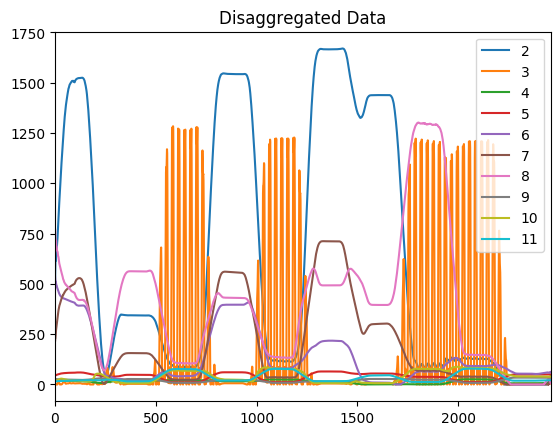

In [ ]:
from nilmtk_contrib.disaggregate import Seq2Seq

import time
# Start of the measurement 
start_time = time.time()

from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")

experiment1 = {
    'power': {'mains': ['active'],'appliance': ['active']},
    'sample_rate': 1,
    # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
    'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
    'methods': {"SEQ2SEQ":Seq2Seq({})},
        'site_only': True,# Change to True to use only the site 
    'save_results': False, # False to not save results
    'results_dir': './results_nilm/',  # 
      'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
       'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

api_results_experiment_1 = API(experiment1)
print(api_results_experiment_1)

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

###  Only metrics, with harmonics, without filter and  1 second of sampling

In [ ]:
from nilmtk_contrib.disaggregate import Seq2Seq

import time
# Start of the measurement 
start_time = time.time()


from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")

experiment1 = {
    'power': {'mains': ['active'],'appliance': ['active']},
    'sample_rate': 1,
    # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
    'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
    'methods': {"SEQ2SEQ":Seq2Seq({})},
        'site_only': False,# Change to True to use only the site
    'save_results': False, # False to not save results
    'results_dir': './results_nilm/',# Directory to save results
      'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
       'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}
# Execute the experiment
api_results_experiment_1 = API(experiment1)
# Print the results
print(api_results_experiment_1)

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : Seq2Seq
............  mae  ..............
       SEQ2SEQ
2   389.737793
3    51.141468
4    20.528118
5    34.260769
6   102.055450
7   331.767487
8   226.708847
9    13.805988
10   29.211407
11   14.635570
............  rmse  ..............
       SEQ2SEQ
2   547.758529
3   123.430763
4    20.961847
5    38.821258
6   153.715304
7   618.952442
8   302.399854
9    17.811092
10   34.352169
11   29.539779
............  f1score  ..............
     SEQ2SEQ
2   0.486577
3   0.800755
4   0.892391
5   0.580906
6   0.229442
7   0.122137
8   0.495394
9   0.694986
10  0.454774
11  0.514306
............  nde  ..............
     SEQ2SEQ
2   0.500310
3   0.276962
4   0.591202
5   0.687549
6   0.669133
7   0.928908
8   0.466989
9   0.615426
10  0.762020
11  0.682507
Execution time: 754.77 seconds


# Effect of the power filters

##  Power filter of 100 Watt

In [ ]:

from nilmtk_contrib.disaggregate import Seq2Seq

import time
# Start of the measurement 
start_time = time.time()

from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")

experiment1 = {
    'power': {'mains': ['active'],'appliance': ['active']},
    'sample_rate': 1, # Sampling of 1 second
    # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
    'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
    'methods': {"SEQ2SEQ":Seq2Seq({'on_power_threshold': 100})}, # We add the on_power_threshold parameter
     'site_only': False, # Change to True to use only the site
    'save_results': False, # False to not save results
    'results_dir': './results_nilm/',  # Directory to save results
      'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
       'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}
# Execute the experiment
api_results_experiment_1 = API(experiment1)
# Print the results
print(api_results_experiment_1)

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : Seq2Seq
............  mae  ..............
       SEQ2SEQ
2   318.739777
3    54.324162
4    19.837570
5    30.873701
6    82.832085
7   281.875488
8   363.530090
9    14.018464
10   23.145782
11   15.568399
............  rmse  ..............
       SEQ2SEQ
2   515.013440
3   128.438374
4    21.293999
5    38.142001
6   132.102847
7   606.862191
8   445.842689
9    17.428077
10   32.247524
11   30.220406
............  f1score  ..............
     SEQ2SEQ
2   0.641309
3   0.729452
4   0.828292
5   0.536997
6   0.237443
7   0.133835
8   0.489383
9   0.701005
10  0.483472
11  0.516312
............  nde  ..............
     SEQ2SEQ
2   0.470402
3   0.288198
4   0.600570
5   0.675519
6   0.575052
7   0.910763
8   0.688504
9   0.602192
10  0.715334
11  0.698233
Execution time: 535.67 seconds


### Power filter of 50 Watt

In [ ]:
from nilmtk_contrib.disaggregate import Seq2Seq

import time
# Start of the measurement 
start_time = time.time()

from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")
# Define the experiment configuration
experiment1 = {
    'power': {'mains': ['active'],'appliance': ['active']},
    'sample_rate': 1,# Sampling of 1 second
    # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
    'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
    'methods': {"SEQ2SEQ":Seq2Seq({'on_power_threshold': 50})}, # We add the on_power_threshold parameter
    'site_only': False,# Change to True to use only the site
    'save_results': False,# False to not save results
    'results_dir': './results_nilm/',  # Directory to save results
      'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
       'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}
# Execute the experiment
api_results_experiment_1 = API(experiment1)
# Print the results
print(api_results_experiment_1)

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : Seq2Seq
............  mae  ..............
       SEQ2SEQ
2   392.706787
3    56.113159
4    22.405291
5    37.293453
6   119.539047
7   305.266602
8   339.819946
9    14.600326
10   18.424971
11   17.523174
............  rmse  ..............
       SEQ2SEQ
2   551.272108
3   137.160241
4    24.034320
5    42.794931
6   161.753544
7   594.464570
8   431.210161
9    18.076921
10   29.020318
11   29.694491
............  f1score  ..............
     SEQ2SEQ
2   0.487723
3   0.773703
4   0.734831
5   0.560943
6   0.237443
7   0.302172
8   0.492704
9   0.698687
10  0.514387
11  0.456713
............  nde  ..............
     SEQ2SEQ
2   0.503520
3   0.307769
4   0.677857
5   0.757926
6   0.704124
7   0.892157
8   0.665908
9   0.624611
10  0.643746
11  0.686082
Execution time: 592.27 seconds


###  Only metrics, without harmonics , without  filter and  1 second of sampling

In [ ]:
from nilmtk_contrib.disaggregate import Seq2Seq

import time
# Start of the measurement 
start_time = time.time()

from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")
# Define the experiment configuration
experiment1 = {
    'power': {'mains': ['active'],'appliance': ['active']}, # 'mains' and 'appliance' are the keys for the power data
    'sample_rate': 1, # Sampling of 1 second
    # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
    'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
    'methods': {"SEQ2SEQ":Seq2Seq({})},# 
    'site_only': False,# Change to True to use only the site
    'save_results': False, # False to not save results
    'results_dir': './results_nilm/',  # Directory to save results
      'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
       'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}
# Execute the experiment
api_results_experiment_1 = API(experiment1)
# Print the results
print(api_results_experiment_1)

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : Seq2Seq
............  mae  ..............
       SEQ2SEQ
2   474.711792
3    52.788120
4    20.317516
5    32.348072
6   107.823326
7   277.478088
8   310.689026
9    13.906123
10   22.991734
11   12.438383
............  rmse  ..............
       SEQ2SEQ
2   604.566632
3   126.068918
4    21.507285
5    40.428180
6   157.532344
7   600.971297
8   408.237140
9    17.434096
10   30.381688
11   27.713375
............  f1score  ..............
     SEQ2SEQ
2   0.477288
3   0.824376
4   0.865837
5   0.562943
6   0.210681
7   0.162190
8   0.482713
9   0.699969
10  0.476473
11  0.517781
............  nde  ..............
     SEQ2SEQ
2   0.552198
3   0.282881
4   0.606585
5   0.716009
6   0.685749
7   0.901922
8   0.630431
9   0.602400
10  0.673945
11  0.640308
Execution time: 524.77 seconds


# WINDOWGRU

### Only  disaggregation graphic, with support of harmonics , without filter and  1 second of sampling

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : WindowGRU
Execution time: 16283.86 seconds


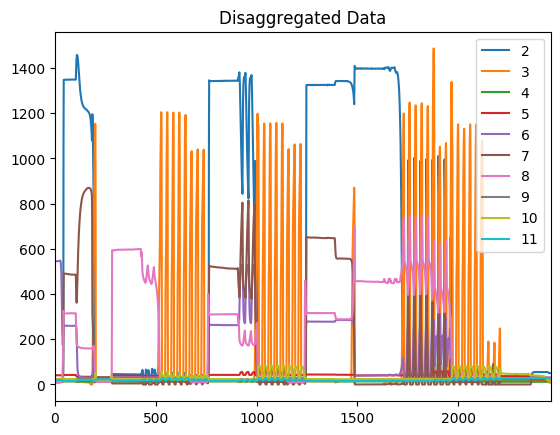

In [ ]:

from nilmtk_contrib.disaggregate import WindowGRU

from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")

import time
# Start of the measurement 
start_time = time.time()

experiment1 = {
    'power': {'mains': ['apparent','active'],'appliance': ['apparent','active']},# 'mains' and 'appliance' are the keys for the power data
    'sample_rate': 1,# Sampling of 1 second
    'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
    'methods': {"WINDOWGRU":WindowGRU({})},
    'site_only': True,# Change to True to use only the site 
    'train': {    
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {1: {'start_time': '2023-06-09 09:34:00', 'end_time': '2023-06-09 12:54:00'}}
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {1: {'start_time': '2023-06-09 12:55:00', 'end_time': '2023-06-09 13:36:00'}}
            }
        },
        'metrics': ['mae','rmse','f1score','nde']
    }
}


try:
    # Execute the experiment
    api_results_experiment_1 = API(experiment1)
    # Print the results
    print(api_results_experiment_1)
except Exception as e:
    # Handle any exceptions that occur during the API call    
    print(f"Error: {e}")

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

###  Metrics with harmonics without filter and 1 second of sampling

In [ ]:

from nilmtk_contrib.disaggregate import WindowGRU

from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")

import time
# Start of the measurement 
start_time = time.time()

experiment1 = {
    'power': {'mains': ['active'],'appliance': ['active']},# 'mains' and 'appliance' are the keys for the power data
    'sample_rate': 1,# Sampling of 1 second
    'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
    'methods': {"WINDOWGRU":WindowGRU({})},
    'site_only': False,# Change to True to use only the site
    'save_results': False, # False to not save results
    'results_dir': './results_nilm/',  # Directory to save results
      'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
       'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}
# Execute the experiment
api_results_experiment_1 = API(experiment1)
# Print the results
print(api_results_experiment_1)

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : WindowGRU
............  mae  ..............
     WINDOWGRU
2   495.625610
3   106.979141
4    22.270107
5    39.011135
6   124.241478
7   320.051239
8   324.589172
9    16.339676
10   28.715923
11   22.681238
............  rmse  ..............
     WINDOWGRU
2   682.751694
3   242.328854
4    22.600914
5    40.187640
6   179.783762
7   595.837357
8   467.976929
9    16.707224
10   36.653836
11   36.734902
............  f1score  ..............
    WINDOWGRU
2    0.455259
3    0.520102
4    0.945564
5    0.580906
6    0.208303
7    0.167199
8    0.455744
9    0.740722
10   0.454774
11   0.456713
............  nde  ..............
    WINDOWGRU
2    0.623610
3    0.543753
4    0.637429
5    0.711749
6    0.782610
7    0.894217
8    0.722686
9    0.577284
10   0.813077
11   0.848748
Execution time: 8613.56 seconds


### Filter of 100 Watt

In [14]:
from nilmtk_contrib.disaggregate import WindowGRU

from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")

import time
# Start of the measurement 
start_time = time.time()

experiment1 = {
    'power': {'mains': ['active'],'appliance': ['active']},
    'sample_rate': 1,
    'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
    'methods': {"WINDOWGRU":WindowGRU({'on_power_threshold': 100})},
    'site_only': False,
    'save_results': False,
    'results_dir': './results_nilm/',  
      'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
       'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

api_results_experiment_1 = API(experiment1)
print(api_results_experiment_1)

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : WindowGRU
............  mae  ..............
     WINDOWGRU
2   383.081818
3    88.842514
4    22.510662
5    38.251324
6    94.956467
7   291.899292
8   315.088593
9    16.445707
10   27.373714
11   22.199347
............  rmse  ..............
     WINDOWGRU
2   612.907517
3   234.409081
4    22.831159
5    39.609591
6   156.718691
7   610.782746
8   455.934960
9    16.745424
10   33.526269
11   36.360134
............  f1score  ..............
    WINDOWGRU
2    0.563863
3    0.576152
4    0.945564
5    0.580906
6    0.208303
7    0.137034
8    0.537236
9    0.740722
10   0.454774
11   0.456713
............  nde  ..............
    WINDOWGRU
2    0.559816
3    0.525982
4    0.643923
5    0.701511
6    0.682207
7    0.916647
8    0.704089
9    0.578604
10   0.743700
11   0.840089
Execution time: 7775.44 seconds


### Filter of 50 Watt

In [15]:
from nilmtk_contrib.disaggregate import WindowGRU

from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")

import time
# Start of the measurement 
start_time = time.time()

experiment1 = {
    'power': {'mains': ['active'],'appliance': ['active']},
    'sample_rate': 1,
    'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
    'methods': {"WINDOWGRU":WindowGRU({'on_power_threshold': 50})},
    'site_only': False,
    'save_results': False,
    'results_dir': './results_nilm/',  
      'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
       'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

api_results_experiment_1 = API(experiment1)
print(api_results_experiment_1)

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : WindowGRU
............  mae  ..............
     WINDOWGRU
2   395.250519
3    95.694542
4    20.531872
5    38.687614
6    97.561722
7   379.389221
8   317.858337
9    16.974699
10   26.088964
11   23.405270
............  rmse  ..............
     WINDOWGRU
2   605.731479
3   239.051405
4    20.709792
5    40.052389
6   160.645105
7   631.861832
8   437.844900
9    17.326683
10   33.114689
11   36.778328
............  f1score  ..............
    WINDOWGRU
2    0.651978
3    0.632042
4    0.947368
5    0.582344
6    0.208303
7    0.122137
8    0.459785
9    0.740722
10   0.454774
11   0.456713
............  nde  ..............
    WINDOWGRU
2    0.553262
3    0.536399
4    0.584093
5    0.709353
6    0.699299
7    0.948282
8    0.676153
9    0.598688
10   0.734570
11   0.849751
Execution time: 8042.25 seconds


###  Only metrics, without harmonics , without filter and 1 second of sampling

In [ ]:


from nilmtk_contrib.disaggregate import WindowGRU

from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")

import time
# Start of the measurement 
start_time = time.time()

experiment1 = {
    'power': {'mains': ['active'],'appliance': ['active']},
    'sample_rate': 1,# Sampling of 1 second
    'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
    'methods': {"WINDOWGRU":WindowGRU({})},
    'site_only': False, # Change to True to use only the site
    'save_results': False, # False to not save results
    'results_dir': './results_nilm/',  # Directory to save results
      'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
       'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}
# Execute the experiment
api_results_experiment_1 = API(experiment1)
# Print the results
print(api_results_experiment_1)

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : WindowGRU
............  mae  ..............
     WINDOWGRU
2   512.727722
3    88.423500
4    20.207600
5    37.589115
6    89.132614
7   297.203064
8   312.510406
9    16.093496
10   27.323990
11   24.150755
............  rmse  ..............
     WINDOWGRU
2   668.013262
3   219.112227
4    20.414068
5    39.873622
6   160.635129
7   611.608586
8   446.603659
9    17.228872
10   35.033553
11   34.969083
............  f1score  ..............
    WINDOWGRU
2    0.455259
3    0.502752
4    0.945564
5    0.582344
6    0.213274
7    0.129923
8    0.455744
9    0.740722
10   0.456350
11   0.456713
............  nde  ..............
    WINDOWGRU
2    0.610148
3    0.491658
4    0.575752
5    0.706187
6    0.699255
7    0.917886
8    0.689679
9    0.595308
10   0.777135
11   0.807949
Execution time: 6982.46 seconds


### Metrics of 6 algorithms, sampling of 60 seconds, number of epochs=50 and batch size of 32

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : WindowGRU
Generating predictions for : RNN
Generating predictions for : DAE
Generating predictions for : Seq2Point
Generating predictions for : Seq2Seq
Generating predictions for : Mean
Execution time: 6249.13 seconds


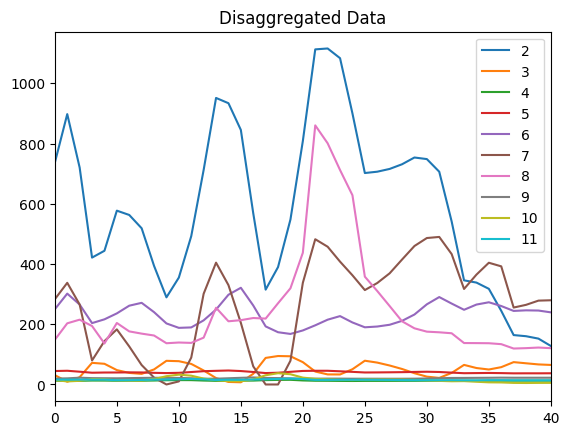

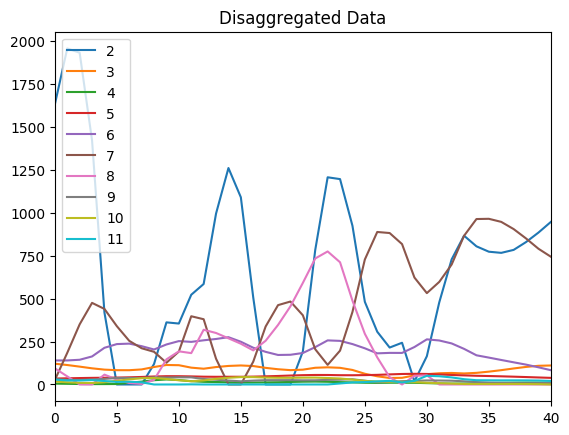

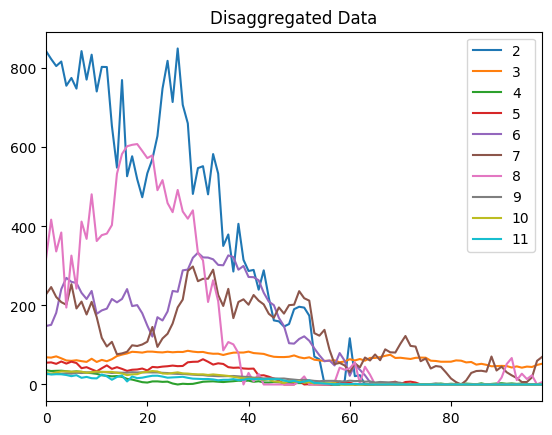

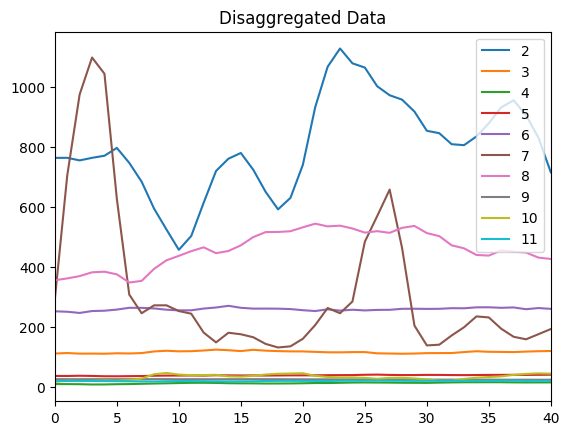

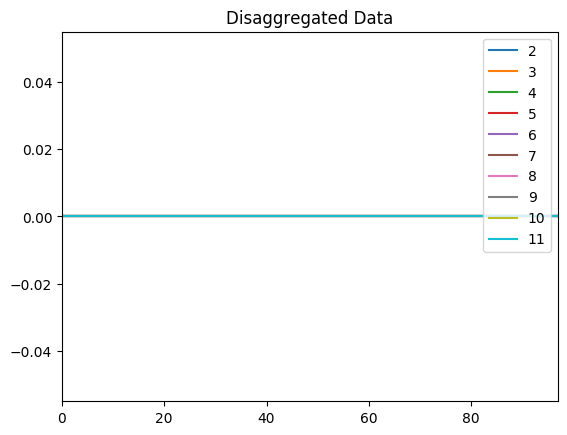

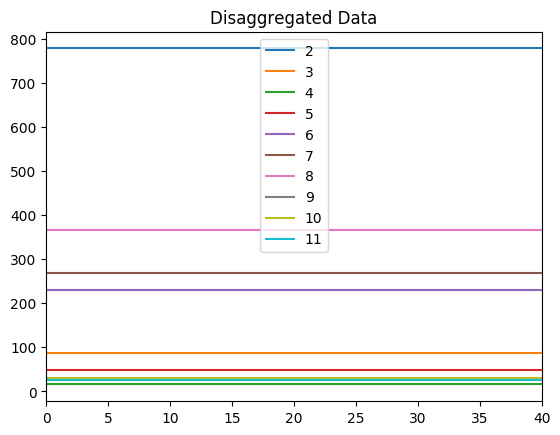

In [1]:
from nilmtk_contrib.disaggregate import WindowGRU, RNN, DAE, Seq2Point, Seq2Seq
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
from nilmtk.api import API
import warnings
import time

warnings.filterwarnings("ignore")

# Start of the measurement 
start_time = time.time()

experiment1 = {
    'power': {'mains': ['active'], 'appliance': ['active']},
    'sample_rate': 60, # Sampling of 60 seconds
    'appliances': [2,3,4,5,6,7,8,9,10,11],  # 
    'methods': { 
        'WindowGRU': WindowGRU({'n_epochs': 50, 'batch_size': 32}),
        'RNN': RNN({'n_epochs': 50, 'batch_size': 32}),
        'DAE': DAE({'n_epochs': 50, 'batch_size': 32}),
        'Seq2Point': Seq2Point({'n_epochs': 50, 'batch_size': 32}),
        'Seq2Seq': Seq2Seq({'n_epochs': 50, 'batch_size': 32}),
        'Mean': Mean({}),
    },
    'site_only': True,# Change to True to use only the site 
    'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score', 'nde'],
    }
}

api_results_experiment_1 = API(experiment1)
print(api_results_experiment_1)

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")


In [2]:
api_results_experiment_1 .errors

[]

In [3]:
api_results_experiment_1 .errors_keys

[]

# All of the algoritms supported in nilmtk_contrib


In [ ]:
from nilmtk_contrib.disaggregate import AFHMM
from nilmtk_contrib.disaggregate import AFHMM_SAC

from nilmtk_contrib.disaggregate import BERT # ❌ Incompatible con Keras 2.2.4

from nilmtk_contrib.disaggregate import DAE # OK
from nilmtk_contrib.disaggregate import DSC

from nilmtk_contrib.disaggregate import ResNet
from nilmtk_contrib.disaggregate import ResNet_classification

from nilmtk_contrib.disaggregate import RNN #OK
from nilmtk_contrib.disaggregate import RNN_attention
from nilmtk_contrib.disaggregate import RNN_attention_classification


from nilmtk_contrib.disaggregate import Seq2Point # OK

from nilmtk_contrib.disaggregate import Seq2Seq  #OK
from nilmtk_contrib.disaggregate import WindowGRU  #OK


# AFHMM
 No works ( error in key 0)

In [ ]:


from nilmtk_contrib.disaggregate import AFHMM

from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")

import time
# Start of the measurement 
start_time = time.time()

experiment1 = {
    'power': {'mains': ['active'],'appliance': ['active']},
    'sample_rate': 1,
    'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
    'methods': {"AFHMM":AFHMM({})},
    'site_only': True,# Change to True to use only the site 
    'train': {    
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {1: {'start_time': '2023-06-09 09:34:00', 'end_time': '2023-06-09 12:54:00'}}
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {1: {'start_time': '2023-06-09 12:55:00', 'end_time': '2023-06-09 13:36:00'}}
            }
        },
        'metrics': ['mae','rmse','f1score','nde']
    }
}

try:
   # Crear el objeto API con la configuración del experimento
   api_results_experiment_1 = API(experiment1)
   # Imprimir los resultados
   print(api_results_experiment_1)
except Exception as e:
      print(f"Error:{e}")  
        
        
        
# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : AFHMM
Error:0
Execution time: 9.27 seconds


# AFHMM_SAC
  No works (Error: Error parsing inputs)

In [ ]:
from nilmtk_contrib.disaggregate import AFHMM_SAC

from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")

import time
# Start of the measurement 
start_time = time.time()

experiment1 = {
    'power': {'mains': ['active'],'appliance': ['active']},
    'sample_rate': 1,
    'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
    'methods': {"AFHMM_SAC":AFHMM_SAC({})},
    'site_only': True,# Change to True to use only the site 
    'train': {    
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {1: {'start_time': '2023-06-09 09:34:00', 'end_time': '2023-06-09 12:54:00'}}
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {1: {'start_time': '2023-06-09 12:55:00', 'end_time': '2023-06-09 13:36:00'}}
            }
        },
        'metrics': ['mae','rmse','f1score','nde']
    }
}




try:
   # Crear el objeto API con la configuración del experimento
   api_results_experiment_1 = API(experiment1)
   # Imprimir los resultados
   print(api_results_experiment_1)
except Exception as e:
      print(f"Error:{e}")  
        
        
        
# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : AFHMM_SAC


Process Process-6:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/carlos/nilmtk_env/lib/python3.7/site-packages/nilmtk_contrib/disaggregate/afhmm_sac.py", line 246, in disaggregate_thread
    prob.solve(solver=cvx.SCS,verbose=False, warm_start=True)
  File "/home/carlos/nilmtk_env/lib/python3.7/site-packages/cvxpy/problems/problem.py", line 462, in solve
    return solve_func(self, *args, **kwargs)
  File "/home/carlos/nilmtk_env/lib/python3.7/site-packages/cvxpy/problems/problem.py", line 959, in _solve
    self, data, warm_start, verbose, kwargs)
  File "/home/carlos/nilmtk_env/lib/python3.7/site-packages/cvxpy/reductions/solvers/solving_chain.py", line 344, in solve_via_data
    solver_opts, problem._solver_cache)
  File "/home/carlos/nilmtk_env/lib/python3.7/site-package

# DSC

No works (ValueError: Error parsing inputs)

In [8]:

from nilmtk_contrib.disaggregate import DSC

from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")

import time
# Start of the measurement 
start_time = time.time()

experiment1 = {
    'power': {'mains': ['active'],'appliance': ['active']},
    'sample_rate': 1,
    'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
    'methods': {"DSC":DSC({})},
    'site_only': True,# Change to True to use only the site 
    'train': {    
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {1: {'start_time': '2023-06-09 09:34:00', 'end_time': '2023-06-09 12:54:00'}}
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {1: {'start_time': '2023-06-09 12:55:00', 'end_time': '2023-06-09 13:36:00'}}
            }
        },
        'metrics': ['mae','rmse','f1score','nde']
    }
}


try:
    api_results_experiment_1 = API(experiment1)
    print(api_results_experiment_1)
except Exception as e:
    print(f"Error: {e}")

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

DSC Initialized with: n_components=10, sparsity_coef(alpha)=20, transform_algorithm=lasso_cd, positive_code=True, positive_dict=True, shape=120, learning_rate=1e-09, iterations=3000
Started training for  DSC
Joint training for  DSC
............... Loading Data for training ...................
Loading data for  DSUAL  dataset
Loading building ...  1
Dropping missing values
...............DSC partial_fit running...............
Number of training windows: 100
Training First dictionary for 2
Error: Positive constraint not supported for 'lars' coding method.
Execution time: 0.48 seconds


DSC Initialized with: n_components=10, sparsity_coef(alpha)=20, transform_algorithm=lasso_cd, positive_code=True, positive_dict=True, shape=120, learning_rate=1e-09, iterations=3000
Started training for  DSC
Joint training for  DSC
............... Loading Data for training ...................
Loading data for  DSUAL  dataset
Loading building ...  1
Dropping missing values
...............DSC partial_fit running...............
Number of training windows: 100
Training First dictionary for 2
Error: Positive constraint not supported for 'lars' coding method.
Execution time: 0.48 segundo

# ResNet

No works ( Error parsing inputs)

In [12]:

from nilmtk_contrib.disaggregate import ResNet

from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")

import time
# Start of the measurement 
start_time = time.time()

experiment1 = {
    'power': {'mains': ['active'],'appliance': ['active']},
    'sample_rate': 1,
    'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
    'methods': {"RESNET":ResNet({})},
    'site_only': True,# Change to True to use only the site 
    'train': {    
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {1: {'start_time': '2023-06-09 09:34:00', 'end_time': '2023-06-09 12:54:00'}}
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {1: {'start_time': '2023-06-09 12:55:00', 'end_time': '2023-06-09 13:36:00'}}
            }
        },
        'metrics': ['mae','rmse','f1score','nde']
    }
}


try:
    api_results_experiment_1 = API(experiment1)
    print(api_results_experiment_1)
except Exception as e:
    print(f"Error: {e}")

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Started training for  ResNet
Joint training for  ResNet
............... Loading Data for training ...................
Loading data for  DSUAL  dataset
Loading building ...  1
Dropping missing values
...............ResNet partial_fit running...............
[(2, array([[-0.7936162 , -0.7936162 , -0.7936162 , ..., -0.78676766,
        -0.7871332 , -0.78700465],
       [-0.7936162 , -0.7936162 , -0.7936162 , ..., -0.7871332 ,
        -0.78700465, -0.7867229 ],
       [-0.7936162 , -0.7936162 , -0.7936162 , ..., -0.78700465,
        -0.7867229 , -0.78663826],
       ...,
       [-0.7874961 , -0.7879948 , -0.78787166, ..., -0.7936162 ,
        -0.7936162 , -0.7936162 ],
       [-0.7879948 , -0.78787166, -0.78780913, ..., -0.7936162 ,
        -0.7936162 , -0.7936162 ],
       [-0.78787166, -0.78780913, -0.7877023 , ..., -0.7936162 ,
        -0.7936162 , -0.7936162 ]], dtype=float32)), (3, array([[-0.30339924, -0.30339924, -0.30339924, ..., -0.28317794,
        -0.28297067, -0.28313932],
     

Train on 10167 samples, validate on 1795 samples
Epoch 1/10
10167/10167 [==============================] - 16s 2ms/step - loss: 0.9214 - val_loss: 0.7620

Epoch 00001: val_loss improved from inf to 0.76205, saving model to ResNet-temp-weights-74894.h5
Error: can't pickle _thread.RLock objects
Execution time: 18.48 seconds


# ResNet_clasification

In [ ]:
from nilmtk_contrib.disaggregate import ResNet_clasification

from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")

import time
# Start of the measurement 
start_time = time.time()

experiment1 = {
    'power': {'mains': ['active'],'appliance': ['active']},
    'sample_rate': 1,
    'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
    'methods': {"ResNet_clasification":ResNet_clasification({})},
    'site_only': True,# Change to True to use only the site 
    'train': {    
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {1: {'start_time': '2023-06-09 09:34:00', 'end_time': '2023-06-09 12:54:00'}}
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {1: {'start_time': '2023-06-09 12:55:00', 'end_time': '2023-06-09 13:36:00'}}
            }
        },
        'metrics': ['mae','rmse','f1score','nde']
    }
}


try:
    api_results_experiment_1 = API(experiment1)
    print(api_results_experiment_1)
except Exception as e:
    print(f"Error: {e}")

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

# DSC 
No works (Positive constraint not supported for 'lars' coding method)

In [13]:

from nilmtk_contrib.disaggregate import DSC

from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")

import time
# Start of the measurement 
start_time = time.time()

experiment1 = {
    'power': {'mains': ['active'],'appliance': ['active']},
    'sample_rate': 1,
    'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
    'methods': {"DSC":DSC({})},
    'site_only': True,# Change to True to use only the site 
    'train': {    
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {1: {'start_time': '2023-06-09 09:34:00', 'end_time': '2023-06-09 12:54:00'}}
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {1: {'start_time': '2023-06-09 12:55:00', 'end_time': '2023-06-09 13:36:00'}}
            }
        },
        'metrics': ['mae','rmse','f1score','nde']
    }
}


try:
    api_results_experiment_1 = API(experiment1)
    print(api_results_experiment_1)
except Exception as e:
    print(f"Error: {e}")

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

DSC Initialized with: n_components=10, sparsity_coef(alpha)=20, transform_algorithm=lasso_cd, positive_code=True, positive_dict=True, shape=120, learning_rate=1e-09, iterations=3000
Started training for  DSC
Joint training for  DSC
............... Loading Data for training ...................
Loading data for  DSUAL  dataset
Loading building ...  1
Dropping missing values
...............DSC partial_fit running...............
Number of training windows: 100
Training First dictionary for 2
Error: Positive constraint not supported for 'lars' coding method.
Execution time: 0.50 seconds


# RNN_attention

In [1]:
from nilmtk_contrib.disaggregate import RNN_attention


from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")

import time
# Start of the measurement 
start_time = time.time()

experiment1 = {
    'power': {'mains': ['active'],'appliance': ['active']},
    'sample_rate': 1,
    'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
    'methods': {"RNN_attention":RNN_attention({})},
     'site_only': True,# Change to True to use only the site 
    'save_results': False,
    'results_dir': './results_nilm/',  
      'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
       'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

api_results_experiment_1 = API(experiment1)
print(api_results_experiment_1)

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

ImportError: cannot import name 'RNN_attention' from 'nilmtk_contrib.disaggregate' (c:\users\carlo\nilmtk-contrib\nilmtk_contrib\disaggregate\__init__.py)

# RNN_attention_clasification

In [ ]:
from nilmtk_contrib.disaggregate import RNN_attention_clasification


from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")

import time
# Start of the measurement 
start_time = time.time()

experiment1 = {
    'power': {'mains': ['active'],'appliance': ['active']},
    'sample_rate': 1,
    'appliances': [2,3,4,5,6,7,8,9,10,11],  #  Use appliance identifiers instead of names
    'methods': {"RNN_attention_clasificaction":RNN_attention_clasification({})},
    'site_only': True,# Change to True to use only the site 
    'save_results': False,
    'results_dir': './results_nilm/',  
      'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 09:34:00',
                        'end_time': '2023-06-09 12:54:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2023-06-09 12:55:00',
                        'end_time': '2023-06-09 13:36:00'
                    }
                }
            }
        },
       'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

api_results_experiment_1 = API(experiment1)
print(api_results_experiment_1)

# End of the measurement 
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")